### MODULO 1: Exploración y visualización de Datos

### Cargamos todas la librerias que serán necesarías para la visualización de datos

In [1]:
import os

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from scipy.stats import ks_2samp,chisquare,chi2_contingency
from sklearn.feature_selection import SelectKBest, f_regression

import pygal
from pygal.style import Style
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import SVG, display, HTML, Javascript, display_html

from datetime import datetime, timedelta

import cufflinks as cf

cf.go_offline()
%matplotlib inline
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

 Cargamos el data set con el que trabajaremos el cual es de todos los alojamientos disponibles en la CDMX por la compañia Airbnb

In [2]:
df = pd.read_csv("/home/maik/Documentos/Diplomado Ciencia de Datos Plus/DB_Host_Airbnb.csv")

/home/maik/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.



    Comentario:
    Este dataset ya esta limpiado con anterioridad en cuentión de formato de datos para mayor agilidad en el modelaje

In [3]:
df.shape

(19314, 106)

In [4]:
df.sample(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6744,20710894,https://www.airbnb.com/rooms/20710894,20190716153352,2019-07-16,"Depto 2, hab mat. cerca polanco","Depto. 2 hab privada con cama matrimonial, eco...","Depto. 1 hab privada con cama matrimonial , cl...","Depto. 2 hab privada con cama matrimonial, eco...",none,"Las calles aledañas son habitacionales, a una ...",Es importante que se mantenga un respeto entre...,Recomiendo utilizar UBER o llegar en taxi. Los...,"Servicio de vigilancia las 24 horas, roof gard...","Es muy raro cuando visito la cdmx, pero a vece...",- Se puede fumar en el balcón - ser respestuos...,nan,nan,https://a0.muscache.com/im/pictures/bbdae4cf-c...,nan,3626302,https://www.airbnb.com/users/show/3626302,Ana Maria,2012-09-20,"Villahermosa, Tabasco, Mexico","Hola\nMi nombre es Ana Maria, me encanta viaja...",within an hour,100.00,nan,f,https://a0.muscache.com/im/pictures/d235db80-5...,https://a0.muscache.com/im/pictures/d235db80-5...,NaN,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Ciudad de México, Ciudad de México, Mexico",NaN,Miguel Hidalgo,nan,Ciudad de México,Ciudad de México,NaN,Mexico City,"Ciudad de México, Mexico",MX,Mexico,19.45,-99.20,f,Apartment,Private room,2,1.00,1,1,Real Bed,"{Wifi,""Free parking on premises"",Essentials,Ha...",nan,607,NaN,NaN,0,250,3,100,1,1125,1,1,1125,1125,1.00,1125.00,6 months ago,t,22,52,82,172,2019-07-16,1,0,2017-09-07,2017-09-07,100.00,10.00,10.00,8.00,10.00,10.00,10.00,f,NaN,"{""Ciudad de México""}",f,f,strict_14_with_grace_period,f,f,3,1,2,0,0.04


     Continuamos definiendo el tipo de variables que tenemos

In [5]:
v_scp=['id','listing_url','host_id','host_url']
v_con=['price','security_deposit','cleaning_fee','extra_people','guests_included','number_of_reviews',
       'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
       'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month',
       'accommodates','bathrooms','bedrooms','beds']
v_dis=['neighbourhood_cleansed','room_type','cancellation_policy']
v_tex=['summary','space','description']
tgt=['host_is_superhost']
v_dat=['host_since']
v_geol=['latitude','longitude']

     El prelimpiado anterior no se cumplio completamente,por lo que trabajamos unicamente la variable que nos falto. Además, dado que nuestro objetivo es mejorar el desempeño de los host, no nos interesa incluir aquellos alojamientos donde aun no haya existido una calificación y por último, se transformará la variable objetivo en numerica

In [6]:
df['review_scores_accuracy']=df['review_scores_accuracy'].apply(lambda x: 0.50 if str(x)=='nan' else x)

for v in ['review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','review_scores_rating','review_scores_cleanliness','review_scores_accuracy']:
    df=df[df[v]!=0.50].reset_index(drop=True)

df['host_is_superhost']=(df['host_is_superhost']=='t')*1

df['property_type']=df['property_type'].apply(lambda x: 'other' if x not in ['Apartment','House'] else x)
df['cancellation_policy']=df['cancellation_policy'].apply(lambda x: 'other' if x not in ['flexible','moderate','strict_14_with_grace_period'] else x)

In [7]:
df.shape

(14196, 106)

In [8]:
14196/19314

0.7350108729419075

     Entendemos ahora que en nuestro conjunto de alojamientos se encuentra al rededor de un 27% de alojamientos que no poseen una calificación por lo que no aportarian información para mejorar el desempeño de nuestros hosts

In [9]:
df.describe(include='all',percentiles=[0.95,0.97,0.99])

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,14196.00,14196,14196.00,14196,14190,13779,11221,13922,14196,10919,6731,10235,9212,10012,8777,0.00,0.00,14196,0.00,14196.00,14196,14196,14196,14167,9139,12552,14196.00,0.00,14196.00,14196,14196,9021,14196.00,14196.00,14196,14196,14196,14196,11716,14196,0.00,14182,14120,13461,14180,14196,14196,14196,14196.00,14196.00,14196,14196,14196,14196.00,14196.00,14196.00,14196.00,14196,14196,70.00,14196.00,962,929,14196.00,14196.00,14196.00,14196.00,14196.00,14196.00,14196.00,14196.00,14196.00,14196.00,14196.00,14196.00,14196,14196,14196.00,14196.00,14196.00,14196.00,14196,14196.00,14196.00,14196,14196,14196.00,14196.00,14196.00,14196.00,14196.00,14196.00,14196.00,14196,8,14016,14196,14196,14196,14196,14196,14196.00,14196.00,14196.00,14196.00,14196.00
unique,nan,14196,nan,2,13955,12791,10176,13348,1,9254,5760,8713,8041,8335,7500,nan,nan,14011,nan,nan,8900,3068,2527,460,5368,4,nan,nan,nan,8885,8885,101,nan,nan,282,2,2,377,54,16,nan,203,87,631,4,204,1,1,nan,nan,2,3,3,nan,nan,nan,nan,5,13756,nan,nan,480,500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,68,1,nan,nan,nan,nan,2,nan,nan,1863,1008,nan,nan,nan,nan,nan,nan,nan,1,3,9,2,1,4,2,2,nan,nan,nan,nan,nan
top,nan,https://www.airbnb.com/rooms/36019167,nan,2019-07-16,Depto Amueblado Nápoles World Trade Center WTC,¡Aventúrate a conocer este NUEVO concepto de H...,Edificio con Personal y Circuito de vigilancia...,¡Aventúrate a conocer este NUEVO concepto de H...,none,The Condesa neighborhood has been changing in ...,"Puedes entrar y salir con total libertad, a la...",El transporte Público que conecta toda la ciud...,"Contamos con una terraza roof garden, dónde pu...",Sabine y Eduardo estamos totalmente dispuestos...,HOUSE RULES: 1. The home is available for chec...,nan,nan,https://a0.muscache.com/im/pictures/7cd761cb-5...,nan,nan,https://www.airbnb.com/users/show/10917267,Carlos,2015-08-27,"Mexico City, Mexico City, Mexico",Soy Mexicano-Argentina. Vivo en la Colonia Con...,within an hour,nan,nan,nan,https://a0.muscache.com/im/users/10764020/prof...,https://a0.muscache.com/im/users/10917267/prof...,Roma Norte,nan,nan,"['email', 'phone']",t,f,"Ciudad de México, Ciudad de México, Mexico",Roma Norte,Cuauhtémoc,nan,Ciudad de México,Ciudad de México,6700,Mexico City,"Ciudad de México, Mexic

In [10]:
for v in df.columns:
    display(v,df[v].value_counts(True))

'id'

12093439   0.00
33484629   0.00
29764222   0.00
2984948    0.00
16169970   0.00
           ... 
16241916   0.00
21829240   0.00
20213367   0.00
13002358   0.00
18286593   0.00
Name: id, Length: 14196, dtype: float64

'listing_url'

https://www.airbnb.com/rooms/36019167   0.00
https://www.airbnb.com/rooms/24716487   0.00
https://www.airbnb.com/rooms/31690622   0.00
https://www.airbnb.com/rooms/34153589   0.00
https://www.airbnb.com/rooms/18474173   0.00
                                        ... 
https://www.airbnb.com/rooms/27720267   0.00
https://www.airbnb.com/rooms/24759988   0.00
https://www.airbnb.com/rooms/16894567   0.00
https://www.airbnb.com/rooms/20146808   0.00
https://www.airbnb.com/rooms/35485317   0.00
Name: listing_url, Length: 14196, dtype: float64

'scrape_id'

20190716153352   1.00
Name: scrape_id, dtype: float64

'last_scraped'

2019-07-16   0.89
2019-07-17   0.11
Name: last_scraped, dtype: float64

'name'

Depto Amueblado Nápoles World Trade Center WTC       0.00
Polanco: Colivers                                    0.00
The Aunts house                                      0.00
Urban Premium Room                                   0.00
Urban Private Room                                   0.00
                                                     ... 
Tu depa en Narvarte                                  0.00
Casa Art Deco en la Roma Sur                         0.00
Pequeño cuarto con baño privado en Villa Olímpica    0.00
Amplio cuarto cerca de Coyocán                       0.00
☀Habitación Acogedora ☯ Relax ★ Cerca de Polanco ★   0.00
Name: name, Length: 13955, dtype: float64

'summary'

¡Aventúrate a conocer este NUEVO concepto de HOSTAL! Disfruta tu viaje en Hostal CASA MX alameda donde viajeros de corazón, profesión o afición son bienvenidos. Estamos a unos pasos del jardín más antiguo de México: la Alameda Central.Nuestros diseños son únicos, es más, para qué te lo contamos, ven y goza de la calidad de nuestro servicio.                                                                                                                                                            0.00
LONDRES 212.  Departamentos Amueblados completamente equipados: Cocineta Equipada, Frigobar, Microondas, estufa eléctrica, Utensilios de cocina y mesa para dos personas. En uno de los lugares más céntricos de la Ciudad de México a unas cuadras de Reforma. Fácil acceso a metro, Metrobús y eco bicis. Es un lugar ideal para pasar un fin de semana conociendo la ciudad o para un viaje de negocios.                                                                                                      

'space'

Edificio con Personal y Circuito de vigilancia las 24 horas, está a unos pasos del World Trade Center,  Pepsi Center, Avenida de los Insurgentes, y a su alrededor encuentras todo lo que necesites para tu estancia en la Ciudad de México, sea de placer o de negocios tu visita: Bancos, Centros Comerciales (Superama, Sears, Sanborns, Liverpool, etc.), Cines, Teatros,  Bares, Restaurantes, Gimnasios, Spa, Mercados, Oficinas de Gobierno, Parques, Museos.                                                                                                                                                                                                                                                                                               0.00
Si buscas privacidad la tendrás en tu propia habitación, si buscas charlar con personas que al igual que tú vienen a la fabulosa Ciudad de México, podrás hacerlo en el roof garden                                                                             

'description'

¡Aventúrate a conocer este NUEVO concepto de HOSTAL! Disfruta tu viaje en Hostal CASA MX alameda donde viajeros de corazón, profesión o afición son bienvenidos. Estamos a unos pasos del jardín más antiguo de México: la Alameda Central.Nuestros diseños son únicos, es más, para qué te lo contamos, ven y goza de la calidad de nuestro servicio. Un hostal que cuenta con las comodidades que se adaptan a tus necesidades. El precio aquí señalado es por persona, ya que esta publicación es para rentar una cama en una habitación compartida. Contamos con los mejores servicios WiFi gratis Sala de juegos Desayuno incluido Bicicletas Terraza Habitación-Room  -Un cuarto en orden habla bien de quien lo usa. *A room in order speaks well of who uses it -La limpieza se hace a partir de las 12:00 pm y es gratis para ti!, pero si no la necesitas avisa en recepción. *Cleaning starts at noon, but if you don`t need it tell to reception -Si tu no cuidas tus pulmones, nosotros si. Aquí no se puede fumar!  *If yo

'experiences_offered'

none   1.00
Name: experiences_offered, dtype: float64

'neighborhood_overview'

The Condesa neighborhood has been changing in the recent years. It has become a perfect walkable area. Is has everything that you may need. Fancy Bars, Mezcal shops, night clubs, all kinds of restaurants of all prices and all foods. Supermarkets, convenience, and also department stores. Banks, galeries, yoga studios, cinemas, etc. Everything at walking distance. It really is a very enjoyable area. Additionally there are two big parks where people walk their pets or go out running. The Chapultepec park is accessed within 10 minute walk. I holds great museums and is perfect for jogging.                                                                                                                                                                                                                                                                                                                                                                                                                         

'notes'

Puedes entrar y salir con total libertad, a la hora que gustes, mientras no molestes a los que duermen en los otras habitaciones, El día que llegues te daré un código de la cerradura digital para que puedas llegar sin importar la hora                                                                                                                                                                                                                                                                                                                                                                                                                              0.00
The apartment is in a newly renovated building which is part of the revitalization project of the Historical Center of Mexico City. You'll have to fill a brief survey which we will send online for your checkin.                                                                                                                                         

'transit'

El transporte Público que conecta toda la ciudad de la manera más rápida es el Metro, mismo que se encuentra caminando, incluso el Metrobus está muy cerca.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          0.00
Aventúrate a conocer y a conectarte con la CDMX, ya sea en coche, metro, metrobús o bicicleta, ya que nuestra ubicación está muy cerca de una de las principales Avenidas que ha sido símbolo de la patria mexicana. Hablamos 

'access'

Contamos con una terraza roof garden, dónde puedes tomar tus alimentos, leer o disfrutar del sol Contamos con refrigerador y wifi de alta velocidad Nos esmeramos en que siempre estén impecables y limpias las zonas comunes.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

'interaction'

Sabine y Eduardo estamos totalmente dispuestos a ayudarte en lo que necesites, resolver cualquier tipo de duda que tengas y, trataremos de darte los mejores consejos de lugares para visitar, restaurantes y bares para que pases un rato agradable y pruebes la mejor comida de la zona. Cualquier cosa que necesites, no dudes en preguntar!   0.00
Usually I'm not in the building as I'm a frequent traveller, but either the doorman or cleaning ladies can assist you with your stay. For any questions you may have you can contact me or Jess. Our working hours are from 9:00 am to 9:00 pm.                                                                                                   0.00
Hello! We are always available through Airbnb messages for whatever you may need. We prefer to give you your privacy but are available for questions/concerns or to help you out with whatever you might need!                                                                                                            

'house_rules'

HOUSE RULES: 1. The home is available for check in after 3pm. Check out is before 11am. Depending on availability of the home, we are happy to accommodate an early check-in.  2.- Reservations may be booked up until 11:00am local time on the day of check in. Reservations received after 11:00am local time may be subject to cancellation if they cannot be accommodated. The house will be ready up to six hours after a reservation confirmation has been received.  3. At check in, you will be required to provide a valid photo ID and sign our renters agreement outlining our terms and conditions. A copy of this will be forwarded to you upon request. 4. For stays longer than one month, additional security deposit will be required. For stays longer than three months, the last month of rent will also be due at check in. 5. Complimentary maid service is included for reservations over 7 nights (1 maid service per week). Additional services are available upon request. 6. Smoking is strictly prohibited 

'thumbnail_url'

Series([], Name: thumbnail_url, dtype: float64)

'medium_url'

Series([], Name: medium_url, dtype: float64)

'picture_url'

https://a0.muscache.com/im/pictures/7cd761cb-5ec7-4dda-899c-af7f0c18cae3.jpg?aki_policy=large   0.00
https://a0.muscache.com/im/pictures/135883a2-9469-4f9d-9bcd-54d9424b4b13.jpg?aki_policy=large   0.00
https://a0.muscache.com/im/pictures/07871942-fefc-4a42-a143-8948a229fff0.jpg?aki_policy=large   0.00
https://a0.muscache.com/im/pictures/9cbc53a0-5acf-484e-b659-eda4c1462cc3.jpg?aki_policy=large   0.00
https://a0.muscache.com/im/pictures/67974715-6cff-4aea-9385-6248b0aa7b33.jpg?aki_policy=large   0.00
                                                                                                ... 
https://a0.muscache.com/im/pictures/0ca6ca36-45ac-4923-80ea-444ee311d977.jpg?aki_policy=large   0.00
https://a0.muscache.com/im/pictures/d48cca73-71c4-4380-9937-03a34f31a763.jpg?aki_policy=large   0.00
https://a0.muscache.com/im/pictures/e1482797-7352-4ff8-9269-a35c36dc7095.jpg?aki_policy=large   0.00
https://a0.muscache.com/im/pictures/0ffc391a-6840-49f3-9c43-a66e27bdb2cb.jpg?aki_policy=lar

'xl_picture_url'

Series([], Name: xl_picture_url, dtype: float64)

'host_id'

10917267    0.00
10764020    0.00
4448934     0.00
42700394    0.00
53361285    0.00
            ... 
248319170   0.00
25094504    0.00
251866429   0.00
74829789    0.00
146788354   0.00
Name: host_id, Length: 8900, dtype: float64

'host_url'

https://www.airbnb.com/users/show/10917267    0.00
https://www.airbnb.com/users/show/10764020    0.00
https://www.airbnb.com/users/show/4448934     0.00
https://www.airbnb.com/users/show/42700394    0.00
https://www.airbnb.com/users/show/53361285    0.00
                                              ... 
https://www.airbnb.com/users/show/48534029    0.00
https://www.airbnb.com/users/show/14369937    0.00
https://www.airbnb.com/users/show/92846911    0.00
https://www.airbnb.com/users/show/262494333   0.00
https://www.airbnb.com/users/show/26853494    0.00
Name: host_url, Length: 8900, dtype: float64

'host_name'

Carlos          0.01
Alejandro       0.01
Jorge           0.01
Eduardo         0.01
Alejandra       0.01
                ... 
Van             0.00
Sandrushka      0.00
Salomé          0.00
C. De Lourdes   0.00
Jesus Rene      0.00
Name: host_name, Length: 3068, dtype: float64

'host_since'

2015-08-27   0.00
2014-05-11   0.00
2016-08-29   0.00
2016-01-04   0.00
2012-12-20   0.00
             ... 
2019-01-01   0.00
2011-11-05   0.00
2013-04-24   0.00
2012-08-14   0.00
2015-02-24   0.00
Name: host_since, Length: 2527, dtype: float64

'host_location'

Mexico City, Mexico City, Mexico                      0.43
Mexico City, Federal District, Mexico                 0.24
MX                                                    0.09
Mexico                                                0.05
Mexico City, Distrito Federal, Mexico                 0.03
                                                      ... 
Nottingham, England, United Kingdom                   0.00
Av Forestal #2 \n\nhttps://goo.gl/maps/wEH53iqTrj82   0.00
Poissy, Île-de-France, France                         0.00
Pownal, Vermont, United States                        0.00
Gland, Vaud, Switzerland                              0.00
Name: host_location, Length: 460, dtype: float64

'host_about'

Soy Mexicano-Argentina. Vivo en la Colonia Condesa en la Ciudad de México, la cual me gusta muchísimo por sus increíbles alternativas culturales y gastronómicas. Disfruto entendiendo las distintas miradas de la gente y del mundo. Coach de vida y ejecutivo, trabajo en mi casa y disfruto recibir gente. Practico y doy clases de Yoga.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

'host_response_time'

within an hour       0.78
within a few hours   0.13
within a day         0.07
a few days or more   0.02
Name: host_response_time, dtype: float64

'host_response_rate'

100.00   0.71
0.50     0.12
90.00    0.03
99.00    0.02
80.00    0.02
0.00     0.01
98.00    0.01
50.00    0.01
96.00    0.01
97.00    0.01
95.00    0.01
94.00    0.01
92.00    0.01
67.00    0.01
75.00    0.00
86.00    0.00
93.00    0.00
91.00    0.00
83.00    0.00
88.00    0.00
89.00    0.00
70.00    0.00
33.00    0.00
60.00    0.00
82.00    0.00
40.00    0.00
25.00    0.00
78.00    0.00
71.00    0.00
76.00    0.00
85.00    0.00
43.00    0.00
79.00    0.00
63.00    0.00
87.00    0.00
57.00    0.00
56.00    0.00
44.00    0.00
73.00    0.00
29.00    0.00
38.00    0.00
81.00    0.00
58.00    0.00
69.00    0.00
77.00    0.00
20.00    0.00
84.00    0.00
30.00    0.00
17.00    0.00
46.00    0.00
Name: host_response_rate, dtype: float64

'host_acceptance_rate'

Series([], Name: host_acceptance_rate, dtype: float64)

'host_is_superhost'

0   0.59
1   0.41
Name: host_is_superhost, dtype: float64

'host_thumbnail_url'

https://a0.muscache.com/im/users/10764020/profile_pic/1409023069/original.jpg?aki_policy=profile_small       0.00
https://a0.muscache.com/im/users/10917267/profile_pic/1403261186/original.jpg?aki_policy=profile_small       0.00
https://a0.muscache.com/im/pictures/aec8a06a-442a-456c-8718-a88d86a792a7.jpg?aki_policy=profile_small        0.00
https://a0.muscache.com/im/pictures/user/fdc7c999-c76c-4a04-8cf7-6404f574eaeb.jpg?aki_policy=profile_small   0.00
https://a0.muscache.com/im/pictures/user/f98055dc-d3bd-483d-a6e5-9da9ea3145ed.jpg?aki_policy=profile_small   0.00
                                                                                                             ... 
https://a0.muscache.com/im/users/28995965/profile_pic/1425881929/original.jpg?aki_policy=profile_small       0.00
https://a0.muscache.com/im/pictures/3981be33-dc41-40d2-9514-0af041cebafd.jpg?aki_policy=profile_small        0.00
https://a0.muscache.com/im/pictures/user/c5ff3f2f-23a8-40bf-9579-b3ef58930de0.jpg?aki_po

'host_picture_url'

https://a0.muscache.com/im/users/10917267/profile_pic/1403261186/original.jpg?aki_policy=profile_x_medium       0.00
https://a0.muscache.com/im/users/10764020/profile_pic/1409023069/original.jpg?aki_policy=profile_x_medium       0.00
https://a0.muscache.com/im/pictures/user/fdc7c999-c76c-4a04-8cf7-6404f574eaeb.jpg?aki_policy=profile_x_medium   0.00
https://a0.muscache.com/im/pictures/aec8a06a-442a-456c-8718-a88d86a792a7.jpg?aki_policy=profile_x_medium        0.00
https://a0.muscache.com/im/pictures/user/f98055dc-d3bd-483d-a6e5-9da9ea3145ed.jpg?aki_policy=profile_x_medium   0.00
                                                                                                                ... 
https://a0.muscache.com/im/pictures/eea92884-cfab-46c2-9fda-07c3c82da2e5.jpg?aki_policy=profile_x_medium        0.00
https://a0.muscache.com/im/pictures/user/4c2f33ca-4470-401c-99f3-bc65815237d7.jpg?aki_policy=profile_x_medium   0.00
https://a0.muscache.com/im/pictures/user/abc1f676-5d4d-40c0-b284

'host_neighbourhood'

Roma Norte                0.14
Polanco                   0.08
Hipódromo                 0.08
Condesa                   0.08
Centro Histórico          0.08
                          ... 
Poplar                    0.00
Hacienda del Rosario      0.00
Ampliación Daniel Garza   0.00
North Kuta                0.00
Ciutat Vella              0.00
Name: host_neighbourhood, Length: 101, dtype: float64

'host_listings_count'

1     0.37
2     0.19
3     0.10
4     0.06
5     0.04
6     0.04
7     0.02
8     0.02
9     0.02
10    0.01
12    0.01
31    0.01
13    0.01
18    0.01
15    0.01
19    0.01
11    0.01
16    0.00
0     0.00
49    0.00
14    0.00
21    0.00
17    0.00
24    0.00
26    0.00
32    0.00
25    0.00
125   0.00
47    0.00
44    0.00
30    0.00
33    0.00
42    0.00
38    0.00
48    0.00
28    0.00
39    0.00
20    0.00
23    0.00
88    0.00
52    0.00
72    0.00
41    0.00
100   0.00
Name: host_listings_count, dtype: float64

'host_total_listings_count'

1     0.37
2     0.19
3     0.10
4     0.06
5     0.04
6     0.04
7     0.02
8     0.02
9     0.02
10    0.01
12    0.01
31    0.01
13    0.01
18    0.01
15    0.01
19    0.01
11    0.01
16    0.00
0     0.00
49    0.00
14    0.00
21    0.00
17    0.00
24    0.00
26    0.00
32    0.00
25    0.00
125   0.00
47    0.00
44    0.00
30    0.00
33    0.00
42    0.00
38    0.00
48    0.00
28    0.00
39    0.00
20    0.00
23    0.00
88    0.00
52    0.00
72    0.00
41    0.00
100   0.00
Name: host_total_listings_count, dtype: float64

'host_verifications'

['email', 'phone']                                                                                              0.11
['email', 'phone', 'reviews', 'jumio', 'government_id']                                                         0.07
['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']   0.07
['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'government_id']                                0.06
['email', 'phone', 'reviews']                                                                                   0.05
                                                                                                                ... 
['phone', 'google', 'reviews']                                                                                  0.00
['phone', 'jumio', 'offline_government_id', 'selfie', 'government_id']                                          0.00
['phone', 'google', 'jumio', 'offline_government_id', 'governmen

'host_has_profile_pic'

t   1.00
f   0.00
Name: host_has_profile_pic, dtype: float64

'host_identity_verified'

f   0.62
t   0.38
Name: host_identity_verified, dtype: float64

'street'

Ciudad de México, Ciudad de México, Mexico                            0.66
Ciudad de México, CDMX, Mexico                                        0.11
Ciudad de México, Distrito Federal, Mexico                            0.08
Mexico City, Federal District, Mexico                                 0.03
Ciudad de México, D.F., Mexico                                        0.02
                                                                      ... 
Merced Gómez, Mexico                                                  0.00
Mexico City, Condesa, Mexico                                          0.00
Ciuduad de México, Ciudad de México, Mexico                           0.00
Ciudad de México, Piedad Narvarte, Delegación Benito Juarez, Mexico   0.00
Col. Cuauhtémoc CDMX, Ciudad de Mexico, Mexico                        0.00
Name: street, Length: 377, dtype: float64

'neighbourhood'

Roma Norte                          0.12
Polanco                             0.10
Hipódromo                           0.07
Condesa                             0.07
Centro Histórico                    0.07
Coyoacán                            0.06
Colonia Cuauhtémoc                  0.05
Del Valle                           0.04
Juárez                              0.04
Roma Sur                            0.04
Narvarte                            0.03
Anzures                             0.03
Nápoles                             0.03
Escandón                            0.02
Campestre/Guadalupe Inn             0.02
San Miguel Chapultepec              0.02
San Rafael                          0.01
San Diego Churubusco/Country Club   0.01
San Pedro De Los Pinos              0.01
Santa María La Ribera               0.01
Guerrero                            0.01
Doctores                            0.01
Portales                            0.01
Tabacalera                          0.01
Florida/Axotla  

'neighbourhood_cleansed'

Cuauhtémoc               0.43
Miguel Hidalgo           0.16
Benito Juárez            0.16
Coyoacán                 0.08
Álvaro Obregón           0.04
Tlalpan                  0.04
Cuajimalpa de Morelos    0.02
Venustiano Carranza      0.02
Gustavo A. Madero        0.01
Iztacalco                0.01
Azcapotzalco             0.01
Iztapalapa               0.01
La Magdalena Contreras   0.01
Xochimilco               0.00
Tláhuac                  0.00
Milpa Alta               0.00
Name: neighbourhood_cleansed, dtype: float64

'neighbourhood_group_cleansed'

Series([], Name: neighbourhood_group_cleansed, dtype: float64)

'city'

Ciudad de México                           0.88
Mexico City                                0.05
Juárez                                     0.01
Centro                                     0.01
Colonia Juárez                             0.00
                                           ... 
De Cortés                                  0.00
San Miguel Chapultepec II Sección          0.00
Portales Norte                             0.00
San Pedro de los pinos; Ciudad de México   0.00
centro Ciudad de México                    0.00
Name: city, Length: 203, dtype: float64

'state'

Ciudad de México                    0.71
CDMX                                0.12
Distrito Federal                    0.09
Federal District                    0.03
D.F.                                0.02
                                    ... 
Villa Coyoacan, Alcaldia Coyoacan   0.00
Delegación Tlalpan                  0.00
Ciudad de México                    0.00
Tlalpan, Distrito Federal           0.00
Coyoacan Ciudad de México           0.00
Name: state, Length: 87, dtype: float64

'zipcode'

6700    0.10
6100    0.06
6140    0.04
6000    0.04
6500    0.04
        ... 
8840    0.00
61000   0.00
15540   0.00
10350   0.00
9720    0.00
Name: zipcode, Length: 631, dtype: float64

'market'

Mexico City             1.00
Other (International)   0.00
Santander               0.00
Pochutla                0.00
Name: market, dtype: float64

'smart_location'

Ciudad de México, Mexico                                0.87
Mexico City, Mexico                                     0.05
Juárez, Mexico                                          0.01
Centro, Mexico                                          0.01
Colonia Juárez, Mexico                                  0.00
                                                        ... 
Cuahutemoc, Mexico                                      0.00
Ciudad de México, Santa Fe, Mexico                      0.00
Ciudad de México, Colonia Chapultepec Morales, Mexico   0.00
Cuidad de México , Mexico                               0.00
Alvaro Obregón, Mexico                                  0.00
Name: smart_location, Length: 204, dtype: float64

'country_code'

MX   1.00
Name: country_code, dtype: float64

'country'

Mexico   1.00
Name: country, dtype: float64

'latitude'

19.42   0.00
19.42   0.00
19.41   0.00
19.44   0.00
19.41   0.00
        ... 
19.30   0.00
19.37   0.00
19.41   0.00
19.43   0.00
19.41   0.00
Name: latitude, Length: 8285, dtype: float64

'longitude'

-99.17   0.00
-99.17   0.00
-99.17   0.00
-99.17   0.00
-99.16   0.00
         ... 
-99.18   0.00
-99.10   0.00
-99.14   0.00
-99.27   0.00
-99.19   0.00
Name: longitude, Length: 7114, dtype: float64

'is_location_exact'

t   0.72
f   0.28
Name: is_location_exact, dtype: float64

'property_type'

Apartment   0.64
other       0.23
House       0.13
Name: property_type, dtype: float64

'room_type'

Entire home/apt   0.55
Private room      0.44
Shared room       0.01
Name: room_type, dtype: float64

'accommodates'

2    0.42
4    0.20
1    0.12
3    0.09
6    0.07
5    0.05
8    0.02
7    0.01
10   0.01
16   0.01
9    0.00
12   0.00
11   0.00
14   0.00
15   0.00
13   0.00
41   0.00
Name: accommodates, dtype: float64

'bathrooms'

1.00    0.67
2.00    0.17
1.50    0.08
2.50    0.03
3.00    0.02
3.50    0.01
4.00    0.01
5.00    0.00
4.50    0.00
0.50    0.00
0.00    0.00
5.50    0.00
6.00    0.00
8.00    0.00
10.00   0.00
9.00    0.00
7.00    0.00
20.00   0.00
16.00   0.00
50.00   0.00
7.50    0.00
6.50    0.00
11.00   0.00
9.50    0.00
17.00   0.00
10.50   0.00
12.50   0.00
15.00   0.00
8.50    0.00
Name: bathrooms, dtype: float64

'bedrooms'

1    0.64
2    0.24
3    0.06
0    0.03
4    0.01
5    0.00
6    0.00
10   0.00
7    0.00
8    0.00
11   0.00
9    0.00
50   0.00
20   0.00
16   0.00
24   0.00
18   0.00
22   0.00
14   0.00
12   0.00
15   0.00
Name: bedrooms, dtype: float64

'beds'

1    0.55
2    0.25
3    0.11
4    0.05
5    0.02
6    0.01
0    0.01
7    0.00
8    0.00
16   0.00
9    0.00
12   0.00
10   0.00
11   0.00
18   0.00
13   0.00
36   0.00
20   0.00
14   0.00
24   0.00
50   0.00
25   0.00
33   0.00
26   0.00
21   0.00
15   0.00
Name: beds, dtype: float64

'bed_type'

Real Bed        0.99
Pull-out Sofa   0.00
Futon           0.00
Airbed          0.00
Couch           0.00
Name: bed_type, dtype: float64

'amenities'

{Wifi,Kitchen,Gym,Breakfast,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,"Lock on bedroom door","Hair dryer",Iron,"Laptop friendly workspace","Self check-in","Building staff","Hot water","Bed linens","Extra pillows and blankets","BBQ grill","Patio or balcony","Luggage dropoff allowed","Long term stays allowed","Cleaning before checkout","Wide hallways","Wide entrance for guests","Well-lit path to entrance","Wide entrance","Accessible-height bed","Accessible-height toilet","Wide entryway","Roll-in shower"}   0.00
{}                                                                                                                                                                                                                                                                                                                                                                                                                                                  

'square_feet'

0.00      0.34
1292.00   0.04
237.00    0.03
861.00    0.03
172.00    0.03
753.00    0.03
840.00    0.03
1184.00   0.03
700.00    0.03
270.00    0.01
35.00     0.01
129.00    0.01
1722.00   0.01
3660.00   0.01
646.00    0.01
86.00     0.01
484.00    0.01
5382.00   0.01
12.00     0.01
1050.00   0.01
1615.00   0.01
1550.00   0.01
603.00    0.01
1023.00   0.01
3000.00   0.01
915.00    0.01
3444.00   0.01
732.00    0.01
1798.00   0.01
2153.00   0.01
1119.00   0.01
538.00    0.01
452.00    0.01
969.00    0.01
30.00     0.01
323.00    0.01
183.00    0.01
248.00    0.01
Name: square_feet, dtype: float64

'price'

304     0.03
493     0.03
247     0.03
398     0.03
341     0.03
        ... 
3282    0.00
7000    0.00
13109   0.00
4857    0.00
56912   0.00
Name: price, Length: 408, dtype: float64

'weekly_price'

$2,000.00    0.02
$7,588.00    0.02
$9,485.00    0.02
$4,743.00    0.02
$2,500.00    0.01
             ... 
$20,700.00   0.00
$5,503.00    0.00
$2,005.00    0.00
$3,421.00    0.00
$1,490.00    0.00
Name: weekly_price, Length: 480, dtype: float64

'monthly_price'

$28,456.00    0.02
$7,000.00     0.02
$37,942.00    0.01
$9,000.00     0.01
$22,765.00    0.01
              ... 
$6,755.00     0.00
$29,594.00    0.00
$6,204.00     0.00
$16,500.00    0.00
$144,178.00   0.00
Name: monthly_price, Length: 500, dtype: float64

'security_deposit'

0       0.67
1897    0.03
2000    0.03
5000    0.02
3000    0.02
        ... 
2218    0.00
2106    0.00
94253   0.00
6128    0.00
2047    0.00
Name: security_deposit, Length: 464, dtype: float64

'cleaning_fee'

0     0.39
300   0.06
350   0.04
150   0.04
200   0.03
      ... 
119   0.00
434   0.00
410   0.00
402   0.00
682   0.00
Name: cleaning_fee, Length: 349, dtype: float64

'guests_included'

1    0.66
2    0.18
4    0.06
3    0.06
5    0.02
6    0.01
7    0.00
8    0.00
16   0.00
10   0.00
9    0.00
12   0.00
11   0.00
15   0.00
14   0.00
26   0.00
Name: guests_included, dtype: float64

'extra_people'

0     0.47
100   0.06
150   0.05
200   0.05
190   0.05
      ... 
242   0.00
444   0.00
420   0.00
282   0.00
999   0.00
Name: extra_people, Length: 273, dtype: float64

'minimum_nights'

1      0.46
2      0.35
3      0.12
4      0.02
5      0.02
7      0.01
6      0.01
30     0.00
15     0.00
10     0.00
14     0.00
28     0.00
8      0.00
20     0.00
60     0.00
90     0.00
25     0.00
180    0.00
12     0.00
29     0.00
1000   0.00
365    0.00
13     0.00
21     0.00
69     0.00
91     0.00
19     0.00
93     0.00
300    0.00
18     0.00
45     0.00
22     0.00
9      0.00
182    0.00
100    0.00
120    0.00
24     0.00
16     0.00
175    0.00
Name: minimum_nights, dtype: float64

'maximum_nights'

1125   0.56
30     0.09
90     0.04
60     0.03
365    0.03
       ... 
179    0.00
115    0.00
604    0.00
1110   0.00
1127   0.00
Name: maximum_nights, Length: 197, dtype: float64

'minimum_minimum_nights'

1     0.47
2     0.35
3     0.11
4     0.02
5     0.02
7     0.01
6     0.01
30    0.00
15    0.00
10    0.00
14    0.00
8     0.00
20    0.00
28    0.00
90    0.00
60    0.00
180   0.00
12    0.00
25    0.00
365   0.00
13    0.00
21    0.00
29    0.00
300   0.00
16    0.00
24    0.00
120   0.00
182   0.00
9     0.00
22    0.00
93    0.00
18    0.00
26    0.00
69    0.00
19    0.00
91    0.00
45    0.00
100   0.00
175   0.00
Name: minimum_minimum_nights, dtype: float64

'maximum_minimum_nights'

1      0.42
2      0.36
3      0.13
4      0.02
5      0.02
7      0.02
6      0.01
30     0.00
15     0.00
10     0.00
14     0.00
28     0.00
8      0.00
20     0.00
25     0.00
60     0.00
90     0.00
180    0.00
21     0.00
29     0.00
12     0.00
13     0.00
1000   0.00
9      0.00
365    0.00
22     0.00
16     0.00
24     0.00
120    0.00
182    0.00
300    0.00
93     0.00
69     0.00
19     0.00
91     0.00
45     0.00
100    0.00
175    0.00
Name: maximum_minimum_nights, dtype: float64

'minimum_maximum_nights'

1125   0.56
30     0.09
90     0.04
60     0.03
365    0.03
       ... 
179    0.00
115    0.00
604    0.00
1110   0.00
1127   0.00
Name: minimum_maximum_nights, Length: 197, dtype: float64

'maximum_maximum_nights'

1125   0.56
30     0.09
90     0.04
60     0.03
365    0.03
       ... 
179    0.00
115    0.00
604    0.00
1110   0.00
1127   0.00
Name: maximum_maximum_nights, Length: 197, dtype: float64

'minimum_nights_avg_ntm'

1.00     0.43
2.00     0.33
3.00     0.11
1.30     0.02
4.00     0.02
         ... 
21.40    0.00
1.80     0.00
100.00   0.00
19.00    0.00
182.00   0.00
Name: minimum_nights_avg_ntm, Length: 93, dtype: float64

'maximum_nights_avg_ntm'

1125.00   0.56
30.00     0.09
90.00     0.04
60.00     0.03
365.00    0.03
          ... 
2001.00   0.00
1110.00   0.00
746.20    0.00
52.00     0.00
33.60     0.00
Name: maximum_nights_avg_ntm, Length: 234, dtype: float64

'calendar_updated'

today           0.20
2 weeks ago     0.09
a week ago      0.07
2 months ago    0.07
3 weeks ago     0.06
                ... 
50 months ago   0.00
55 months ago   0.00
46 months ago   0.00
54 months ago   0.00
44 months ago   0.00
Name: calendar_updated, Length: 68, dtype: float64

'has_availability'

t   1.00
Name: has_availability, dtype: float64

'availability_30'

0    0.22
30   0.11
29   0.07
14   0.04
28   0.03
27   0.03
15   0.03
25   0.02
24   0.02
11   0.02
23   0.02
26   0.02
19   0.02
12   0.02
16   0.02
22   0.02
20   0.02
13   0.02
9    0.02
18   0.02
10   0.02
8    0.02
6    0.02
1    0.02
17   0.02
7    0.02
21   0.02
5    0.02
4    0.02
3    0.01
2    0.01
Name: availability_30, dtype: float64

'availability_60'

0    0.16
60   0.11
59   0.07
58   0.03
44   0.03
     ... 
6    0.00
9    0.00
4    0.00
5    0.00
8    0.00
Name: availability_60, Length: 61, dtype: float64

'availability_90'

0    0.13
90   0.10
89   0.07
88   0.03
74   0.03
     ... 
26   0.00
23   0.00
8    0.00
5    0.00
18   0.00
Name: availability_90, Length: 91, dtype: float64

'availability_365'

0     0.08
365   0.07
364   0.03
179   0.02
363   0.01
      ... 
184   0.00
183   0.00
189   0.00
100   0.00
209   0.00
Name: availability_365, Length: 366, dtype: float64

'calendar_last_scraped'

2019-07-16   0.89
2019-07-17   0.11
Name: calendar_last_scraped, dtype: float64

'number_of_reviews'

1     0.11
2     0.08
3     0.06
4     0.05
5     0.04
      ... 
267   0.00
275   0.00
323   0.00
303   0.00
339   0.00
Name: number_of_reviews, Length: 270, dtype: float64

'number_of_reviews_ltm'

1     0.12
0     0.11
2     0.08
3     0.06
4     0.05
      ... 
120   0.00
100   0.00
114   0.00
139   0.00
156   0.00
Name: number_of_reviews_ltm, Length: 131, dtype: float64

'first_review'

2019-06-30   0.01
2018-10-28   0.00
2018-11-19   0.00
2019-04-21   0.00
2019-02-24   0.00
             ... 
2014-05-13   0.00
2015-07-28   0.00
2014-09-09   0.00
2014-10-24   0.00
2014-06-14   0.00
Name: first_review, Length: 1863, dtype: float64

'last_review'

2019-06-30   0.06
2019-07-07   0.04
2019-07-14   0.03
2019-07-01   0.03
2019-07-08   0.02
             ... 
2017-10-01   0.00
2016-10-07   0.00
2017-02-06   0.00
2017-10-26   0.00
2015-08-07   0.00
Name: last_review, Length: 1008, dtype: float64

'review_scores_rating'

100.00   0.33
98.00    0.11
97.00    0.08
96.00    0.08
99.00    0.07
95.00    0.06
93.00    0.05
94.00    0.04
90.00    0.03
80.00    0.02
92.00    0.02
91.00    0.02
89.00    0.01
87.00    0.01
88.00    0.01
60.00    0.01
85.00    0.01
20.00    0.01
84.00    0.00
86.00    0.00
83.00    0.00
70.00    0.00
73.00    0.00
40.00    0.00
82.00    0.00
76.00    0.00
75.00    0.00
67.00    0.00
50.00    0.00
77.00    0.00
79.00    0.00
81.00    0.00
72.00    0.00
68.00    0.00
78.00    0.00
74.00    0.00
65.00    0.00
47.00    0.00
69.00    0.00
Name: review_scores_rating, dtype: float64

'review_scores_accuracy'

10.00   0.83
9.00    0.13
8.00    0.02
6.00    0.01
2.00    0.01
7.00    0.00
4.00    0.00
5.00    0.00
Name: review_scores_accuracy, dtype: float64

'review_scores_cleanliness'

10.00   0.73
9.00    0.20
8.00    0.04
6.00    0.01
7.00    0.01
2.00    0.00
4.00    0.00
5.00    0.00
Name: review_scores_cleanliness, dtype: float64

'review_scores_checkin'

10.00   0.89
9.00    0.08
8.00    0.02
6.00    0.00
2.00    0.00
7.00    0.00
4.00    0.00
5.00    0.00
Name: review_scores_checkin, dtype: float64

'review_scores_communication'

10.00   0.87
9.00    0.10
8.00    0.02
6.00    0.01
2.00    0.00
7.00    0.00
4.00    0.00
5.00    0.00
Name: review_scores_communication, dtype: float64

'review_scores_location'

10.00   0.87
9.00    0.10
8.00    0.02
6.00    0.00
2.00    0.00
7.00    0.00
4.00    0.00
5.00    0.00
Name: review_scores_location, dtype: float64

'review_scores_value'

10.00   0.72
9.00    0.22
8.00    0.04
6.00    0.01
7.00    0.01
2.00    0.01
5.00    0.00
4.00    0.00
Name: review_scores_value, dtype: float64

'requires_license'

f   1.00
Name: requires_license, dtype: float64

'license'

PELA751126M54   0.62
16%             0.25
IVA             0.12
Name: license, dtype: float64

'jurisdiction_names'

{"Ciudad de México"}                                                            0.78
{"Mexico City"," MX Zip Codes 3"}                                               0.21
{"Estado de Mexico"," MX"}                                                      0.00
{"Mexico City"," MX Zip Codes 3"," Estado de Mexico"," MX"}                     0.00
{"Mexico City"," MX 3"," Mexico City"," MX"}                                    0.00
{"Estado de Mexico"," MX (zip codes)"}                                          0.00
{"Mexico City"," MX Zip Codes 3"," Mexico City"," MX 3"," Mexico City"," MX"}   0.00
{"Estado de Mexico"," MX (zip codes)"," Estado de Mexico"," MX"}                0.00
{"Quintana Roo"," Mexico"}                                                      0.00
Name: jurisdiction_names, dtype: float64

'instant_bookable'

t   0.58
f   0.42
Name: instant_bookable, dtype: float64

'is_business_travel_ready'

f   1.00
Name: is_business_travel_ready, dtype: float64

'cancellation_policy'

flexible                      0.42
moderate                      0.34
strict_14_with_grace_period   0.24
other                         0.00
Name: cancellation_policy, dtype: float64

'require_guest_profile_picture'

f   0.99
t   0.01
Name: require_guest_profile_picture, dtype: float64

'require_guest_phone_verification'

f   0.99
t   0.01
Name: require_guest_phone_verification, dtype: float64

'calculated_host_listings_count'

1    0.44
2    0.18
3    0.10
4    0.05
5    0.04
6    0.03
7    0.02
8    0.01
9    0.01
10   0.01
13   0.01
16   0.01
18   0.01
12   0.01
45   0.01
29   0.01
14   0.01
11   0.01
15   0.00
24   0.00
20   0.00
39   0.00
23   0.00
42   0.00
44   0.00
37   0.00
19   0.00
32   0.00
31   0.00
30   0.00
25   0.00
28   0.00
33   0.00
17   0.00
26   0.00
21   0.00
Name: calculated_host_listings_count, dtype: float64

'calculated_host_listings_count_entire_homes'

0    0.36
1    0.33
2    0.10
3    0.05
4    0.02
5    0.02
6    0.02
13   0.01
7    0.01
10   0.01
9    0.01
44   0.01
12   0.01
8    0.01
16   0.00
29   0.00
11   0.00
24   0.00
23   0.00
33   0.00
14   0.00
26   0.00
18   0.00
45   0.00
15   0.00
37   0.00
32   0.00
38   0.00
25   0.00
19   0.00
20   0.00
21   0.00
Name: calculated_host_listings_count_entire_homes, dtype: float64

'calculated_host_listings_count_private_rooms'

0    0.47
1    0.25
2    0.10
3    0.06
4    0.03
5    0.02
6    0.02
7    0.01
9    0.01
15   0.00
12   0.00
10   0.00
24   0.00
18   0.00
8    0.00
13   0.00
30   0.00
22   0.00
11   0.00
14   0.00
16   0.00
Name: calculated_host_listings_count_private_rooms, dtype: float64

'calculated_host_listings_count_shared_rooms'

0    0.97
1    0.01
3    0.00
2    0.00
4    0.00
22   0.00
13   0.00
5    0.00
Name: calculated_host_listings_count_shared_rooms, dtype: float64

'reviews_per_month'

1.00    0.03
2.00    0.01
0.06    0.01
0.10    0.01
0.05    0.01
        ... 
7.86    0.00
6.77    0.00
8.11    0.00
12.31   0.00
7.23    0.00
Name: reviews_per_month, Length: 874, dtype: float64

In [11]:
df[df['property_type']=='Apartment']['host_is_superhost'].value_counts(True)

0   0.60
1   0.40
Name: host_is_superhost, dtype: float64

    Dada la mayor presencia de Host con tipo de propiedad 'Apartment', se continua a brindar recomendaciones para este sector

In [12]:
df=df[df['property_type']=='Apartment'].reset_index(drop=True)

     Ya que se ha delimitado el problema continuamos a ver si hay outliers

In [13]:
df.describe(percentiles=[0.9,0.95,0.97,0.99])

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9018.00,9018.00,0.00,0.00,0.00,9018.00,9018.00,0.00,9018.00,9018.00,9018.00,0.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,42.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00,9018.00
mean,22763000.55,20190716153352.00,nan,nan,nan,88896199.66,83.89,nan,0.40,5.54,5.54,nan,19.41,-99.17,3.24,1.35,1.48,1.81,492.02,1081.77,2022.18,251.90,1.78,130.47,2.70,692.98,2.44,2.78,690.08,691.69,2.65,690.87,13.84,33.62,55.54,205.12,28.42,14.63,95.38,9.75,9.60,9.83,9.80,9.82,9.61,4.30,3.18,1.09,0.03,1.80
std,8856560.74,0.00,nan,nan,nan,73921961.31,34.26,nan,0.49,11.96,11.96,nan,0.04,0.03,1.89,0.60,0.79,1.15,553.59,2822.05,6310.24,292.14,1.36,194.65,17.25,926.55,8.75,17.26,926.85,926.62,13.76,926.60,11.10,21.70,31.91,131.13,39.38,18.25,8.08,0.78,0.87,0.67,0.74,0.63,0.86,7.66,7.19,2.43,0.32,1.78
min,67703.00,20190716153352.00,nan,nan,nan,13693.00,0.00,nan,0.00,0.00,0.00,nan,19.19,-99.30,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,20.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.01
50%,23317105.00,20190716153352.00,nan,nan,nan,66951653.50,100.00,nan,0.00,2.00,2.00,nan,19.41,-99.17,2.00,1.00,1.00,1.00,237.00,759.00,0.00,200.00,1.00,98.00,2.00,1125.00,2.00,2.00,1125.00,1125.00,2.00,1125.00,14.00,39.00,67.00,194.00,13.00,7.00,98.00,10.00,10.00,10.00,10.00,10.00,10.00,2.00,1.00,0.00,0.00,1.22
90%,33656458.90,20190716153352.00,nan,nan,nan,207394760.50,100.00,nan,1.00,12.00,12.00,nan,19.44,-99.14,6.00,2.00,2.00,3.00,1292.00,1992.00,5000.00,569.00,4.00,312.40,3.00,1125.00,3.00,3.00,1125.00,1125.00,3.00,1125.00,29.00,59.00,89.00,362.00,76.00,40.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,7.00,3.00,0.00,4.18
95%,34783284.40,20190716153352.00,nan,nan,nan,235314895.55,100.00,nan,1.00,28.00,28.00,nan,19.45,-99.13,6.00,2.50,3.00,4.00,1598.85,2599.00,8991.50,680.00,5.00,428.35,5.00,1125.00,5.00,5.00,1125.00,1125.00,5.00,1125.00,30.00,60.00,90.00,364.00,109.00,52.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,23.00,16.00,4.00,0.00,5.29
97%,35339284.48,20190716153352.00,nan,nan,nan,247006735.00,100.00,nan,1.00,33.00,33.00,nan,19.45,-99.11,8.00,3.00,3.00,4.00,1697.39,3244.00,10000.00,800.00,5.00,500.00,7.00,1125.00,6.00,7.00,1125.00,1125.00,7.00,1125.00,30.00,60.00,90.00,365.00,136.49,63.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,29.00,26.00,6.00,0.00,6.17
99%,35929742.93,20190716153352.00,nan,nan,nan,261857354.00,100.00,nan,1.00,49.00,49.00,nan,19.47,-99.08,10.00,3.50,4.00,6.00,1766.84,5248.54,20000.00,1069.00,6.00,850.00,15.00,1125.00,15.00,20.00,1125.00,1125.00,15.83,1125.00,30.00,60.00,90.00,365.00,189.83,82.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,44.00,44.00,12.00,1.00,8.00
max,36668049.00,20190716153352.00,nan,nan,nan,273305296.00,100.00,nan,1.00,125.00,125.00,nan,19.53,-99.00,16.00,8.50,24.00,16.00,1798.00,189708.00,95653.00,664

     Definimos las siguientes función para la eliminación de outliers

In [14]:
def IQR(df,col,range_=1.5,q1=25,q3=75):
    q_1,q_3=np.percentile(df[col],[q1,q3])
    left=q_1-range_*(q_3-q_1)
    rigth=q_3+range_*(q_3-q_1)
    return df[(df[col]>=left)&(df[col]<=rigth)]
def percentil_outliers(df,col,p_i=1,p_f=99):
    q_i,q_f=np.percentile(df[col],[p_i,p_f])
    return df[(df[col]>=q_i)&(df[col]<=q_f)]
def mean_std_outliers(df,col,n_sigma=3):
    mean=df[col].mean()
    std=df[col].std()
    left=mean-n_sigma*std
    rigth=mean+n_sigma*std
    return df[(df[col]>=left)&(df[col]<=rigth)]

In [15]:
df=percentil_outliers(df,'price',p_i=1,p_f=98)

In [16]:
df=percentil_outliers(df,'security_deposit',p_i=0,p_f=95)

In [17]:
for v in [x for x in v_con if x not in ['price','security_deposit']]:
    df=percentil_outliers(df,v,p_i=0,p_f=99)

In [18]:
percentil_outliers(df,'calculated_host_listings_count',p_i=0,p_f=99).describe(percentiles=[0.9,0.95,0.97,0.99])

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7807.00,7807.00,0.00,0.00,0.00,7807.00,7807.00,0.00,7807.00,7807.00,7807.00,0.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,29.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00,7807.00
mean,22938028.31,20190716153352.00,nan,nan,nan,90681394.14,82.86,nan,0.39,4.43,4.43,nan,19.41,-99.17,2.97,1.28,1.38,1.67,412.31,866.42,972.45,215.00,1.64,108.12,2.69,682.66,2.39,2.77,679.64,681.37,2.63,680.43,13.80,33.50,55.30,200.92,26.03,13.75,95.37,9.75,9.60,9.83,9.80,9.81,9.61,3.63,2.47,1.13,0.03,1.70
std,8765798.59,0.00,nan,nan,nan,73711331.90,35.14,nan,0.49,7.78,7.78,nan,0.04,0.03,1.53,0.47,0.62,0.92,545.20,612.49,1729.65,215.67,1.11,132.28,17.54,958.67,7.23,17.54,958.97,958.74,13.52,958.72,11.23,21.99,32.34,131.89,33.62,16.70,8.26,0.80,0.89,0.69,0.76,0.65,0.88,6.11,5.43,2.45,0.35,1.57
min,67703.00,20190716153352.00,nan,nan,nan,13693.00,0.00,nan,0.00,0.00,0.00,nan,19.19,-99.30,1.00,0.00,0.00,0.00,0.00,190.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,20.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.01
50%,23439377.00,20190716153352.00,nan,nan,nan,70270847.00,100.00,nan,0.00,2.00,2.00,nan,19.41,-99.17,2.00,1.00,1.00,1.00,86.00,702.00,0.00,190.00,1.00,95.00,2.00,1125.00,2.00,2.00,1125.00,1125.00,2.00,1125.00,14.00,39.00,67.00,180.00,12.00,7.00,98.00,10.00,10.00,10.00,10.00,10.00,10.00,1.00,1.00,0.00,0.00,1.19
90%,33689535.60,20190716153352.00,nan,nan,nan,207839959.80,100.00,nan,1.00,10.00,10.00,nan,19.44,-99.14,5.00,2.00,2.00,3.00,1098.40,1688.00,3794.00,500.00,4.00,300.00,3.00,1125.00,3.00,3.00,1125.00,1125.00,3.00,1125.00,29.00,59.00,89.00,362.00,71.00,38.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,8.00,6.00,3.00,0.00,4.00
95%,34786158.20,20190716153352.00,nan,nan,nan,235340071.70,100.00,nan,1.00,20.00,20.00,nan,19.45,-99.13,6.00,2.00,3.00,4.00,1550.00,2106.00,5000.00,600.00,4.00,379.00,5.00,1125.00,5.00,5.00,1125.00,1125.00,5.00,1125.00,30.00,60.00,90.00,364.00,101.00,49.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,16.00,13.00,4.00,0.00,5.00
97%,35353154.80,20190716153352.00,nan,nan,nan,246801062.78,100.00,nan,1.00,30.00,30.00,nan,19.45,-99.11,6.00,2.50,3.00,4.00,1734.16,2428.00,5691.00,664.00,5.00,418.64,7.00,1125.00,6.00,7.00,1125.00,1125.00,7.00,1125.00,30.00,60.00,90.00,365.00,120.82,58.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,24.00,23.00,6.00,0.00,5.60
99%,35943263.52,20190716153352.00,nan,nan,nan,261244180.48,100.00,nan,1.00,41.94,41.94,nan,19.47,-99.08,7.00,3.00,3.00,4.00,1776.72,2997.00,6640.00,800.00,5.00,500.00,15.00,1125.00,15.00,15.94,1125.00,1125.00,15.00,1125.00,30.00,60.00,90.00,365.00,159.00,74.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,33.00,32.00,12.00,1.00,6.74
max,36668049.00,20190716153352.00,nan,nan,nan,273305296.00,100.00,nan,1.00,100.00,100.00,nan,19.53,-99.00,8.00,3.00,3.00,5.00,1798.00,3794.00,7588.00,949.00,6.00,700.00

In [19]:
df.to_csv('DB_Airbnb_to_Language_Detection.csv',index=False)

In [20]:
7807/9018

0.8657130184076292

     Del total de alojamientos del tipo Apartment conservamos el 92% de los datos después de quitar outliers

     Ahora se revisará la existencia de valores ausentes

In [21]:
print('Variables Continuas')
for v in v_con:
    if (df[v].isnull().sum() / len(df[v]))>0:
        print(v , df[v].isnull().sum() / len(df[v]))
    if (df[v].isna().sum() / len(df[v]))>0:
        print(v , df[v].isnull().sum() / len(df[v]))
print('Variables Discretas')
for v in v_con:
    if (df[v].isnull().sum() / len(df[v]))>0:
        print(v , df[v].isnull().sum() / len(df[v]))
    if (df[v].isna().sum() / len(df[v]))>0:
        print(v , df[v].isnull().sum() / len(df[v]))        

Variables Continuas
Variables Discretas


     Pasamos a hacer un gráfico de cartas de control para nuestra única variable de fecha que en este caso sería desde cuando es host el usuario, así que transformamos la variable de tipo objeto a tipo datetime

In [22]:
df['host_since']=df['host_since'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))

     Definimos la función que nos ayudará a hacer las cartas de control

In [23]:
def plot_spc(df, date_col, cont_col, freq="month", n_sigmas = 3):
    aux = df[[date_col, cont_col]].copy()
    if freq == "month":
        date_format = "%Y-%m-01"
    elif freq == "day":
        date_format = "%Y-%m-%d"
    elif freq == "year":
        date_format = "%Y-01-01"
    aux[freq] = aux[date_col].dt.strftime(date_format)
    aux = aux[[freq, cont_col]].groupby(freq).mean()
    aux[u"μ"] = aux[cont_col].mean()
    aux[f"μ-{n_sigmas}σ"] = aux[cont_col].mean() - n_sigmas*aux[cont_col].std()
    aux[f"μ+{n_sigmas}σ"] = aux[cont_col].mean() + n_sigmas*aux[cont_col].std()
    line_chart = pygal.Line()
    line_chart.title = 'Statistical Control Process'
    line_chart.x_labels = aux.index
    for col in aux.columns:
        line_chart.add(col, aux[col])
    return line_chart

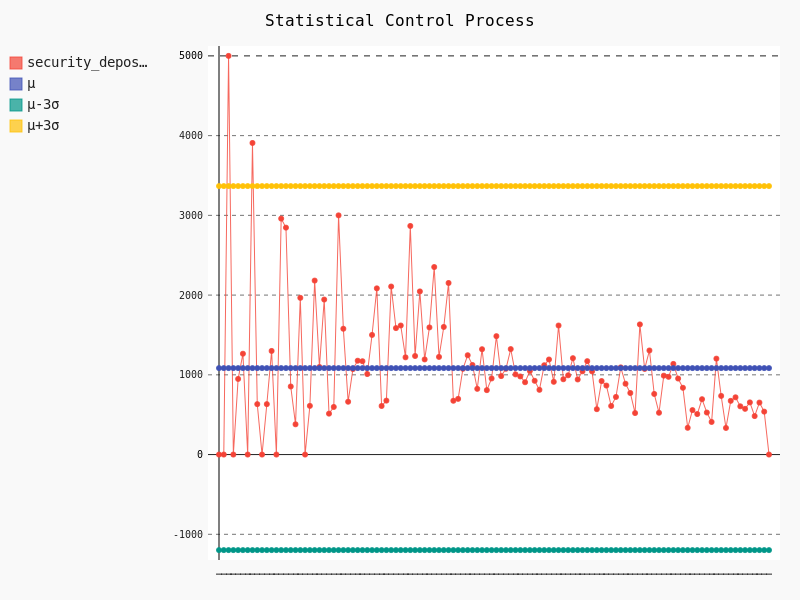

In [24]:
plot_spc(df = df, cont_col="security_deposit", date_col="host_since", freq="month", n_sigmas=3)

     Ahora creamos una TAD 

In [25]:
df[['neighbourhood_cleansed','room_type','cancellation_policy']+['price','security_deposit','cleaning_fee','extra_people','guests_included','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','accommodates','bathrooms','bedrooms','beds']].groupby(['neighbourhood_cleansed','room_type','cancellation_policy']).agg(["mean",'std', "min", "max", "count"])

price  \
                                                                     mean   
neighbourhood_cleansed room_type       cancellation_policy                  
Azcapotzalco           Entire home/apt flexible                    760.58   
                                       moderate                    935.00   
                                       strict_14_with_grace_period 493.00   
                       Private room    flexible                    325.71   
                                       moderate                    366.67   
...                                                                   ...   
Álvaro Obregón         Entire home/apt strict_14_with_grace_period 959.34   
                       Private room    flexible                    432.85   
                                       moderate                    424.48   
                                       strict_14_with_grace_period 379.75   
                       Shared room     moderate                    285.00   

                                                                           \
                                                                      std   
neighbourhood_cleansed room_type       cancellation_policy                  
Azcapotzalco           Entire home/apt flexible                    222.50   
                                       moderate                    582.99   
                                       strict_14_with_grace_period    nan   
                       Private room    flexible                    126.32   
                                       moderate                     97.08   
...                                                                   ...   
Álvaro Obregón         Entire home/apt strict_14_with_grace_period 421.76   
                       Private room    flexible                    193.94   
                                       moderate                    217.44   
                                       strict_14_with_grace_period 197.01   
                       Shared room     moderate                       nan   

                                                                               \
                                                                    min   max   
neighbourhood_cleansed room_type       cancellation_policy                      
Azcapotzalco           Entire home/apt flexible                     247  1233   
                                       moderate                     493  2201   
                                       strict_14_with_grace_period  493   493   
                       Private room    flexible                     190   759   
                                       moderate                     285   474   
...                                                                 ...   ...   
Álvaro Obregón         Entire home/apt strict_14_with_grace_period  419  2258   
                       Private room    flexible                     190   949   
                                       moderate                     190  1195   
                                       strict_14_with_grace_period  228   778   
                       Shared room     moderate                     285   285   

                                                                          \
                                                                   count   
neighbourhood_cleansed room_type       cancellation_policy                 
Azcapotzalco           Entire home/apt flexible                       24   
                                       moderate                        7   
                                       strict_14_with_grace_period     1   
                       Private room    flexible                       34   
                                       moderate                        3   
...                                                                  ...   
Álvaro Obregón         Entire home/apt strict_14_with_grace_period    32   
               

     Pasamos a distinguir cuales son nuestras variables mas importantes con respecto a la etiqueta de 'host_is_superhost'

In [26]:
df[v_con].dtypes

price                            int64
security_deposit                 int64
cleaning_fee                     int64
extra_people                     int64
guests_included                  int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
accommodates                     int64
bathrooms                      float64
bedrooms                         int64
beds                             int64
dtype: object

In [27]:
kb = SelectKBest(k=3, score_func=f_regression)

In [28]:
kb.fit(X=df[v_con], y=df["host_is_superhost"])

SelectKBest(k=3, score_func=<function f_regression at 0x7f73a6d0ab00>)

In [29]:
[x for x, y in zip([x for x in df[v_con] if x != "tgt"], kb.get_support()) if y]

['number_of_reviews', 'review_scores_value', 'reviews_per_month']

### Tranformación Entropica

     este tipo de transformación nos ayuda a conocer el valor de la información que porporciona la variable con respecto a la variable objetivo, así que definimos la siguiente función

In [30]:
def IV(df, var, tgt):
    aux = df[[var, tgt]].groupby(var).agg(["count", "sum"])
    aux["evento"] = aux[tgt, "sum"]
    aux["no_evento"] = aux[tgt, "count"] - aux[tgt, "sum"]
    aux["%evento"] = aux["evento"] / aux["evento"].sum()
    aux["%no_evento"] = aux["no_evento"] / aux["no_evento"].sum()
    aux["WOE"] = np.log(aux["%no_evento"] / aux["%evento"])
    aux["IV"] = (aux["%no_evento"] - aux["%evento"])*aux["WOE"]
    return aux["IV"].sum()

In [31]:
for var in v_con:
    df[f"C_{var}"] = pd.cut(df[var], bins=5).astype(str)

In [32]:
new_disc = [x for x in df.columns if x.startswith("C_")] + v_dis
for col in new_disc:
    df[col] = df[col].fillna("Missing")

In [33]:
df_iv = pd.DataFrame(columns=["iv"])
for var in new_disc:
    print(var)
    df_iv.loc[var, "iv"] = IV(df = df, var = var, tgt = tgt[0])

C_price
C_security_deposit
C_cleaning_fee
C_extra_people
C_guests_included
C_number_of_reviews
C_review_scores_rating
C_review_scores_accuracy
C_review_scores_cleanliness
C_review_scores_checkin
C_review_scores_communication
C_review_scores_location
C_review_scores_value
C_reviews_per_month
C_accommodates
C_bathrooms
C_bedrooms
C_beds
neighbourhood_cleansed
room_type
cancellation_policy


In [34]:
df_iv.sort_values(by='iv',ascending=False)

,iv
C_review_scores_communication,inf
C_review_scores_location,inf
neighbourhood_cleansed,inf
C_review_scores_value,inf
C_review_scores_rating,inf
C_review_scores_accuracy,inf
C_review_scores_cleanliness,inf
C_review_scores_checkin,inf
C_reviews_per_month,0.37
C_number_of_reviews,0.28


In [35]:
df_aux=df_iv[df_iv["iv"] != np.inf].copy()
ls_best = df_aux[df_aux["iv"] >=0.01].index.tolist()

ls_best

['C_price',
 'C_security_deposit',
 'C_cleaning_fee',
 'C_extra_people',
 'C_guests_included',
 'C_number_of_reviews',
 'C_reviews_per_month',
 'C_accommodates',
 'C_bathrooms',
 'C_bedrooms',
 'C_beds',
 'room_type',
 'cancellation_policy']

     Al conocer el IV de las variables con respecto a lal variable objetivo, notamos que las anteriores, son las variables que aportan mayor información

# MODULO 2: MODELACIÓN SUPERVISADA

In [36]:
import pickle
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.metrics import confusion_matrix,r2_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression,LinearRegression, Lars, ElasticNet, Lasso, RidgeClassifier, BayesianRidge,SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, DistanceMetric
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier, VotingClassifier, VotingRegressor
from xgboost.sklearn import XGBClassifier, XGBRegressor
#from sklearn.datasets import load_boston

In [37]:
def WOE(df, var, tgt):
    aux = df[[var, tgt]].groupby(var).agg(["count", "sum"])
    aux["evento"] = aux[tgt, "sum"]
    aux["no_evento"] = aux[tgt, "count"] - aux[tgt, "sum"]
    aux["%evento"] = aux["evento"] / aux["evento"].sum()
    aux["%no_evento"] = aux["no_evento"] / aux["no_evento"].sum()
    aux["WOE"] = np.log(aux["%no_evento"] / aux["%evento"])
    aux.columns = aux.columns.droplevel(1)
    aux = aux[["WOE"]].reset_index().rename(columns={"WOE": f"W_{var}"})
    df = df.merge(aux, on = var, how = "left")
    display(aux)
    return df

In [38]:
ls_best

['C_price',
 'C_security_deposit',
 'C_cleaning_fee',
 'C_extra_people',
 'C_guests_included',
 'C_number_of_reviews',
 'C_reviews_per_month',
 'C_accommodates',
 'C_bathrooms',
 'C_bedrooms',
 'C_beds',
 'room_type',
 'cancellation_policy']

In [39]:
for col in ls_best:
    df = WOE(df = df, var = col, tgt = tgt[0])

,C_price,W_C_price
0,"(1631.6, 2352.4]",-0.33
1,"(186.396, 910.8]",0.21
2,"(2352.4, 3073.2]",-0.43
3,"(3073.2, 3794.0]",-0.52
4,"(910.8, 1631.6]",-0.32


,C_security_deposit,W_C_security_deposit
0,"(-7.588, 1517.6]",0.14
1,"(1517.6, 3035.2]",-0.24
2,"(3035.2, 4552.8]",-0.50
3,"(4552.8, 6070.4]",-0.41
4,"(6070.4, 7588.0]",-0.47


,C_cleaning_fee,W_C_cleaning_fee
0,"(-0.949, 189.8]",0.32
1,"(189.8, 379.6]",-0.24
2,"(379.6, 569.4]",-0.38
3,"(569.4, 759.2]",-0.24
4,"(759.2, 949.0]",-0.30


,C_extra_people,W_C_extra_people
0,"(-0.7, 140.0]",0.13
1,"(140.0, 280.0]",-0.12
2,"(280.0, 420.0]",-0.44
3,"(420.0, 560.0]",-0.03
4,"(560.0, 700.0]",-0.38


,C_guests_included,W_C_guests_included
0,"(0.995, 2.0]",0.07
1,"(2.0, 3.0]",-0.30
2,"(3.0, 4.0]",-0.46
3,"(4.0, 5.0]",-0.21
4,"(5.0, 6.0]",-0.23


,C_number_of_reviews,W_C_number_of_reviews
0,"(0.81, 39.0]",0.29
1,"(115.0, 153.0]",-1.00
2,"(153.0, 191.0]",-0.93
3,"(39.0, 77.0]",-0.87
4,"(77.0, 115.0]",-1.23


,C_reviews_per_month,W_C_reviews_per_month
0,"(0.00209, 1.592]",0.51
1,"(1.592, 3.174]",-0.42
2,"(3.174, 4.756]",-0.91
3,"(4.756, 6.338]",-1.29
4,"(6.338, 7.92]",-1.16


,C_accommodates,W_C_accommodates
0,"(0.993, 2.4]",0.23
1,"(2.4, 3.8]",-0.24
2,"(3.8, 5.2]",-0.26
3,"(5.2, 6.6]",-0.26
4,"(6.6, 8.0]",-0.30


,C_bathrooms,W_C_bathrooms
0,"(-0.003, 0.6]",0.52
1,"(0.6, 1.2]",0.08
2,"(1.2, 1.8]",-0.13
3,"(1.8, 2.4]",-0.21
4,"(2.4, 3.0]",-0.14


,C_bedrooms,W_C_bedrooms
0,"(-0.003, 0.6]",0.35
1,"(0.6, 1.2]",0.11
2,"(1.8, 2.4]",-0.23
3,"(2.4, 3.0]",-0.19


,C_beds,W_C_beds
0,"(-0.005, 1.0]",0.16
1,"(1.0, 2.0]",-0.19
2,"(2.0, 3.0]",-0.27
3,"(3.0, 4.0]",-0.06
4,"(4.0, 5.0]",0.05


,room_type,W_room_type
0,Entire home/apt,-0.24
1,Private room,0.35
2,Shared room,0.60


,cancellation_policy,W_cancellation_policy
0,flexible,0.39
1,moderate,-0.33
2,strict_14_with_grace_period,-0.18


In [40]:
ls_woe = [x for x in df.columns if x.startswith("W")]
lr = LogisticRegression(n_jobs=-1)
lr.fit(X=df[ls_woe], y=df[tgt[0]])
print(lr.score(X=df[ls_woe], y=df[tgt[0]]))
#df['tgt_']=df[tgt].map(lambda x: 1 if x=='mayor al promedio' else 0)
#df["y_hat_"]=df['y_hat'].map(lambda x: 1 if x=='mayor al promedio' else 0)
df["y_hat"] = lr.predict(X=df[ls_woe])
ac=accuracy_score(y_true=df[tgt], y_pred=df['y_hat'])
print(f'Accuracy: {round(ac,2)}')
roc=roc_auc_score(y_true=df[tgt], y_score=df['y_hat'])
print(f'ROC: {round(roc,2)}')

0.676179604261796
Accuracy: 0.68
ROC: 0.63


In [41]:
df_0=df.copy()
df_0,test_0=train_test_split(df_0,test_size=0.20)

### Modelos

In [42]:
scores_0=[]

### Regresión Logistica

In [43]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator = logreg, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
scores_0.append({'Modelo':'logreg','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.7728129625412423
std:0.007461350015095642


### Regresión LARS

No tiene metodo de clasificación por lo que no se considera

### Regresión Ridge

In [44]:
ridreg=RidgeClassifier()
ridreg.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator = ridreg, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
scores_0.append({'Modelo':'ridreg','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.764154086190001
std:0.006562397328032675


### Regresión Lasso

No tiene metodo de clasificación por lo que no se considera

### Regresión Elastica

No tiene metodo de clasificación por lo que no se considera

### Regresión Bayesiana

No tiene metodo de clasificación por lo que no se considera

### Gradiente Estocastico Decendiente

In [45]:
sgdc=SGDClassifier()
sgdc.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator = sgdc, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
scores_0.append({'Modelo':'sgdc','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.5458851051586137
std:0.047952798561005955


### Análisis Discriminante Lineal

In [46]:
lda=LinearDiscriminantAnalysis()
lda.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator = lda, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
scores_0.append({'Modelo':'lda','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.7641482736130294
std:0.00656818561640872


### Regresión Cresta Kernel

No tiene metodo de clasificación por lo que no se considera

### Support Vector Machine

In [47]:
svm=SVC(gamma='auto')
svm.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator = svm, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
scores_0.append({'Modelo':'svm','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.6234704654211882
std:0.00745444319894762


### KNN

In [48]:
knn = KNeighborsClassifier()
knn.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator = knn, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
scores_0.append({'Modelo':'knn','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.645426795399226
std:0.016147628447133137


### Bayes Ingenuo

In [49]:
nb = MultinomialNB()
nb.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator=nb, X=df_0[v_con], y=df_0[tgt[0]],cv=5,n_jobs=-1, scoring="roc_auc")
scores_0.append({'Modelo':'nb','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.5494316991024805
std:0.02179302477174453


### Arboles de Decisión

In [50]:
arb = DecisionTreeClassifier(min_samples_leaf=0.05)
arb.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator = arb, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
scores_0.append({'Modelo':'arb','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.8277090210635489
std:0.006216694677632614


### Redes Neuronales

In [51]:
mlp = MLPClassifier(max_iter=500)
mlp.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator = mlp, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
scores_0.append({'Modelo':'mlp','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

# param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#               'activation': ['tanh', 'relu'],
#               'solver': ['sgd', 'adam'],
#               'alpha': [0.0001, 0.05],
#               'learning_rate': ['constant','adaptive'],
#              }
# hp = RandomizedSearchCV(estimator=mlp, 
#                         param_distributions=param_grid, 
#                         n_iter = 10, 
#                         scoring="roc_auc",
#                         n_jobs=-1, cv=5, 
#                         error_score=-1000, 
#                         verbose=10)
# hp.fit(df_0[v_con+v_dis2],df_0[tgt[0]])
# print(f'Mejor estimador:{hp.best_estimator_}')
# print(f'Mejor Estimador:{hp.best_score_}')

Mean:0.6632461134977155
std:0.05823171345570592


### Comenzamos con los ENSAMBLES

### Bosques Aleatorios

In [52]:
bos = RandomForestClassifier(n_estimators=100, n_jobs=-1, min_samples_leaf=0.05)
bos.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator = bos, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
scores_0.append({'Modelo':'bos','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.8358902736857136
std:0.0040869876230715425


## AdaBoost

In [53]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.05)
ada.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator = ada, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
scores_0.append({'Modelo':'ada','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.8330138840594108
std:0.005020720799586796


## Gradient Boosting

In [54]:
gb = GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=0.05)
gb.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator = gb, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
scores_0.append({'Modelo':'gb','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.8471873551828596
std:0.005061107835519262


## Voting

In [55]:
mix_estim=[("logreg", logreg),("lda",lda),("knn",knn),("nb",nb),("arb",arb),("mlp",mlp)]#,("ridreg",ridreg),("svm",svm)
vc = VotingClassifier(estimators=mix_estim,voting='soft')
ls_res = cross_val_score(estimator = vc, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
scores_0.append({'Modelo':'vc','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.770862037636167
std:0.013095962997902034


### XGBosting

In [56]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=190, max_depth=5, min_child_weight=2, objective="binary:logistic", subsample=0.9, colsample_bytree=0.8, seed=1313)
xgb.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator = xgb, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
scores_0.append({'Modelo':'xgb','Mean':ls_res.mean(),'Std':ls_res.std()})
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.8403711501354441
std:0.0052697938779272474


In [57]:
scores_0=pd.DataFrame(scores_0)

In [58]:
display("CLUSTER 0",scores_0.sort_values(by='Mean',ascending=False))
scores_0.sort_values(by='Mean',ascending=False).to_csv('scores_0.csv')

'CLUSTER 0'

,Modelo,Mean,Std
11,gb,0.85,0.01
13,xgb,0.84,0.01
9,bos,0.84,0.00
10,ada,0.83,0.01
7,arb,0.83,0.01
0,logreg,0.77,0.01
12,vc,0.77,0.01
1,ridreg,0.76,0.01
3,lda,0.76,0.01
8,mlp,0.66,0.06


     Ya que el modelo que se ajusta mejor es el Gradient Boosting, se continua mejorando este modelo 

In [59]:
muestra=pd.DataFrame(v_con)

In [60]:
# %%time
# mgb=[]
# for j in range(10,11):
#     print('\n Muestra al: ',j/10)
#     for i in range(20):
#         lsm=muestra[0].sample(frac=j/10).tolist()

#         gb = GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=0.05)
#         gb.fit(dfsc[lsm],df_0[tgt[0]])
#         ls_res = cross_val_score(estimator = gb, X=dfsc[lsm], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
#         print(ls_res.mean())
        
#         if i%10==0:
#             print(i)
#         if ls_res.mean()>=0.736:
#             mgb.append({'ls':lsm,'Mean':ls_res.mean(),'Std':ls_res.std()})
#             print(lsm)
#             print(f'Mean:{ls_res.mean()}')
#             print(f'std:{ls_res.std()}')

In [61]:
# pd.DataFrame(mgb).sort_values(by='Mean',ascending=False)

In [62]:
# pd.DataFrame(mgb).sort_values(by='Mean',ascending=False)['ls'][7]

In [63]:
# v_con2=['accommodates',
#  'bedrooms',
#  'extra_people',
#  'review_scores_rating',
#  'review_scores_communication',
#  'bathrooms',
#  'review_scores_checkin',
#  'guests_included',
#  'review_scores_accuracy',
#  'review_scores_location',
#  'price',
#  'security_deposit',
#  'number_of_reviews',
#  'reviews_per_month']

In [64]:
gb_0 = GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=0.05)
gb_0.fit(df_0[v_con],df_0[tgt[0]])
ls_res = cross_val_score(estimator = gb_0, X=df_0[v_con], y=df_0[tgt[0]], cv=5, n_jobs=-1, scoring='roc_auc')
print(f'Mean:{ls_res.mean()}')
print(f'std:{ls_res.std()}')

Mean:0.8471873551828596
std:0.005061107835519262


 Ahora empezamos a hiperparametrizar el modelo calculado

In [65]:
gb_0

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.05, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [66]:
param_grid_0 = {
                'learning_rate':[x/100 for x in range(100)]
             }

In [67]:
param_grid_0

{'learning_rate': [0.0,
  0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.06,
  0.07,
  0.08,
  0.09,
  0.1,
  0.11,
  0.12,
  0.13,
  0.14,
  0.15,
  0.16,
  0.17,
  0.18,
  0.19,
  0.2,
  0.21,
  0.22,
  0.23,
  0.24,
  0.25,
  0.26,
  0.27,
  0.28,
  0.29,
  0.3,
  0.31,
  0.32,
  0.33,
  0.34,
  0.35,
  0.36,
  0.37,
  0.38,
  0.39,
  0.4,
  0.41,
  0.42,
  0.43,
  0.44,
  0.45,
  0.46,
  0.47,
  0.48,
  0.49,
  0.5,
  0.51,
  0.52,
  0.53,
  0.54,
  0.55,
  0.56,
  0.57,
  0.58,
  0.59,
  0.6,
  0.61,
  0.62,
  0.63,
  0.64,
  0.65,
  0.66,
  0.67,
  0.68,
  0.69,
  0.7,
  0.71,
  0.72,
  0.73,
  0.74,
  0.75,
  0.76,
  0.77,
  0.78,
  0.79,
  0.8,
  0.81,
  0.82,
  0.83,
  0.84,
  0.85,
  0.86,
  0.87,
  0.88,
  0.89,
  0.9,
  0.91,
  0.92,
  0.93,
  0.94,
  0.95,
  0.96,
  0.97,
  0.98,
  0.99]}

In [68]:
hp_0 = RandomizedSearchCV(estimator=gb_0, 
                        param_distributions=param_grid_0, 
                        n_iter = 10, 
                        scoring="roc_auc",
                        n_jobs=-1, cv=5, 
                        error_score=-1000, 
                        verbose=10)

In [69]:
%%time
hp_0.fit(df_0[v_con],df_0[tgt[0]])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.2s finished


CPU times: user 1.42 s, sys: 28.1 ms, total: 1.45 s
Wall time: 23.3 s


RandomizedSearchCV(cv=5, error_score=-1000,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.05,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=0.05,
                                                        min_samples_split=2,
                                              

In [70]:
print(f'Mejor estimador:{hp_0.best_estimator_}')

Mejor estimador:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.06, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.05, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [71]:
print(f'Mejor Estimador:{hp_0.best_score_}')

Mejor Estimador:0.8472681780657043


In [72]:
best_gb_0=hp_0.best_estimator_

In [73]:
Features=pd.DataFrame(columns=[])
Features['Feature'] = v_con
Features['Value'] = best_gb_0.feature_importances_

In [74]:
Features.sort_values(by='Value',ascending=False)

,Feature,Value
6,review_scores_rating,0.43
5,number_of_reviews,0.36
13,reviews_per_month,0.13
2,cleaning_fee,0.02
0,price,0.02
10,review_scores_communication,0.01
3,extra_people,0.01
1,security_deposit,0.01
12,review_scores_value,0.00
7,review_scores_accuracy,0.00


### Guardamos Modelo

In [75]:
# pickle.dump(gb_0, open('Model_gb_F.mk', 'wb'))
gb_0 = pickle.load(open('/home/maik/Documentos/Diplomado Ciencia de Datos Plus/Modelo Final Proy Airbnb/Model_gb_F.mk', 'rb'))

### Salud del Modelo

### Validate Cluster 0

In [76]:
test_0["y_hat"] = gb_0.predict(test_0[v_con])

In [77]:
(test_0['host_is_superhost']==test_0['y_hat']).to_frame()[0].value_counts(True)

True    0.78
False   0.22
Name: 0, dtype: float64

In [78]:
test_0['host_is_superhost'].value_counts(True)

0   0.58
1   0.42
Name: host_is_superhost, dtype: float64

In [79]:
confusion_matrix(test_0[tgt[0]],test_0['y_hat'])/len(test_0[tgt[0]])

array([[0.4977806 , 0.08560558],
       [0.13633481, 0.28027901]])

### PSI Cluster 0

In [80]:
dc_bins = {}
for feat in v_con:
    dc_bins.update({feat: pd.cut(df_0[feat], bins=5, retbins=True)[1]})

In [81]:
psi_1=[]
for feat in dc_bins.keys():
    aux_t = pd.cut(df_0[feat], bins=dc_bins[feat]).value_counts(True).reset_index().rename(columns = {feat: f"{feat}_train"})
    aux_v = pd.cut(test_0[feat], bins=dc_bins[feat]).value_counts(True).reset_index().rename(columns = {feat: f"{feat}_valid"})
    aux = aux_t.merge(aux_v, on = "index")
    aux["diff"] = aux[f"{feat}_valid"] - aux[f"{feat}_train"]
    aux["log"] = np.log(aux[f"{feat}_valid"] / aux[f"{feat}_train"])
    aux["PSI"] = aux["diff"] * aux["log"]
    psi_1.append({'feature':f'{feat}','PSI':f'{aux["PSI"].sum()}'})
    print(f'PSI of {feat}: {aux["PSI"].sum()}')
#break
pd.DataFrame(psi_1).to_csv('psi_cl_0.csv',sep=',')

PSI of price: 0.0012872065655813697
PSI of security_deposit: 0.0009965290440174064
PSI of cleaning_fee: 0.000525731442901197
PSI of extra_people: 0.0013943477965196343
PSI of guests_included: 0.002496302440897612
PSI of number_of_reviews: 0.0010413115106683451
PSI of review_scores_rating: 0.0008858005453231575
PSI of review_scores_accuracy: inf
PSI of review_scores_cleanliness: 0.005384716700517085
PSI of review_scores_checkin: 0.004452194775178942


/home/maik/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log



PSI of review_scores_communication: 0.004856151216889019
PSI of review_scores_location: 0.003516576059871263
PSI of review_scores_value: 0.003340839383909335
PSI of reviews_per_month: 0.0009740511279610479
PSI of accommodates: 0.0016545933359036966
PSI of bathrooms: 0.00365141909050227
PSI of bedrooms: 0.0018462423973445948
PSI of beds: 0.0021380447982324875


### Desempeño de poder predictivo Cluster 0

In [82]:
for feat in v_con:
    kb = SelectKBest(k=1, score_func=f_classif)
    kb.fit(test_0[[feat,feat]], test_0["y_hat"])
    print(f'Predictive power of {feat}: {kb.scores_[0]}')

Predictive power of price: 27.507161603503643
Predictive power of security_deposit: 23.621212133112234
Predictive power of cleaning_fee: 31.062965167428768
Predictive power of extra_people: 21.287306853288047
Predictive power of guests_included: 19.401029967902026
Predictive power of number_of_reviews: 503.4990934722258
Predictive power of review_scores_rating: 90.73512764297027
Predictive power of review_scores_accuracy: 87.74206640693143
Predictive power of review_scores_cleanliness: 117.14872394854234
Predictive power of review_scores_checkin: 39.12923596291493
Predictive power of review_scores_communication: 48.64294413038688
Predictive power of review_scores_location: 26.85548947176091
Predictive power of review_scores_value: 127.74975615167592
Predictive power of reviews_per_month: 465.7900831796714
Predictive power of accommodates: 34.07771880802694
Predictive power of bathrooms: 23.641629835624634
Predictive power of bedrooms: 17.029760881347226
Predictive power of beds: 18.668

In [83]:
prepo1=[]
for feat in v_con:
    test_0[f"C_{feat}"] = pd.cut(test_0[feat], bins=dc_bins[feat])
    prepo1.append({'feature':feat,'Predic_Power':f'{IV(test_0, f"C_{feat}", "y_hat")}'})
    if IV(test_0, f"C_{feat}", "y_hat")<=100:
        print(f'Predictive power of {feat}: {IV(test_0, f"C_{feat}", "y_hat")}')
pd.DataFrame(prepo1).to_csv('prepo_cl_0.csv',sep=',')

Predictive power of price: 0.06495621841944824
Predictive power of security_deposit: 0.0806538414180344
Predictive power of cleaning_fee: 0.11334490417200838
Predictive power of extra_people: 0.07130585503253643
Predictive power of guests_included: 0.032988541524881516
Predictive power of number_of_reviews: 0.8296234153501886
Predictive power of reviews_per_month: 0.8911357673804119
Predictive power of accommodates: 0.06784902385815286
Predictive power of bedrooms: 0.061092084527317285
Predictive power of beds: 0.0844629879203433


### Estabilidad de las características Cluster 0

In [84]:
esca1=[]
for feat in dc_bins.keys():
    aux_t = pd.cut(df_0[feat], bins=dc_bins[feat]).value_counts(True).reset_index().rename(columns = {feat: f"{feat}_train"})
    aux_v = pd.cut(test_0[feat], bins=dc_bins[feat]).value_counts(True).reset_index().rename(columns = {feat: f"{feat}_valid"})
    aux = aux_t.merge(aux_v, on = "index")
    aux["diff"] = abs(aux[f"{feat}_valid"] - aux[f"{feat}_train"])
    print(f'Stability KS of {feat}: {max(aux["diff"])}')
    esca1.append({'feature':feat,'stability':f'{max(aux["diff"])}'})
pd.DataFrame(esca1).to_csv('esca_cl_0.csv',sep=',')

Stability KS of price: 0.015912104184347298
Stability KS of security_deposit: 0.004269596473566284
Stability KS of cleaning_fee: 0.004357771392497101
Stability KS of extra_people: 0.004793015661655242
Stability KS of guests_included: 0.014134932158096691
Stability KS of number_of_reviews: 0.0038129368592174293
Stability KS of review_scores_rating: 0.00286261834868784
Stability KS of review_scores_accuracy: 0.006347488206227547
Stability KS of review_scores_cleanliness: 0.004291011818757018
Stability KS of review_scores_checkin: 0.004601886219366191
Stability KS of review_scores_communication: 0.00983406726972147
Stability KS of review_scores_location: 0.007772463264388407
Stability KS of review_scores_value: 0.011106118665745512
Stability KS of reviews_per_month: 0.005055931754020332
Stability KS of accommodates: 0.010924842293074721
Stability KS of bathrooms: 0.02048020845073653
Stability KS of bedrooms: 0.01987454629379304
Stability KS of beds: 0.013653237703595333


In [85]:
aux

,index,beds_train,beds_valid,diff
0,"(-0.005, 1.0]",0.56,0.56,0.01
1,"(1.0, 2.0]",0.27,0.27,0.00
2,"(2.0, 3.0]",0.12,0.11,0.01
3,"(3.0, 4.0]",0.04,0.04,0.00
4,"(4.0, 5.0]",0.01,0.01,0.00


### Performance Cluster 0

In [86]:
print(df_0.shape[0]/df.shape[0])
print(roc_auc_score(y_score=test_0["y_hat"], y_true=test_0[tgt[0]]))
print(accuracy_score(y_pred=test_0["y_hat"],y_true=test_0[tgt[0]]))

0.799974632166413
0.7630079081463834
0.7780596068484464


### MODULO 3: MODELACIÓN NO SUPERVISADA

     Comenzamos cargando los modulos de los modelos no supervisados que usaremos

In [87]:
#Para reducción de dimensiones y visualización
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE

#Para Cluster Jerarquico
import scipy.cluster.hierarchy as sch #Dendogramas
from sklearn.cluster import AgglomerativeClustering #cluster Aglomerativo

#Para Cluster de Optimización
from sklearn.cluster import KMeans

#Para Cluster de Densidad
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

#Para Perfilamieto
from scipy.stats import kruskal #Pruebas de Significancia
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import chisquare

#bonus
from IPython.display import HTML, Javascript, display_html

pd.options.display.float_format = '{:,.2f}'.format

### IMPORTANTE:
    La modelación supervisada solo funciona con variables continuas

 Notemos la correlación que existe entre el conjunto de variables continuas

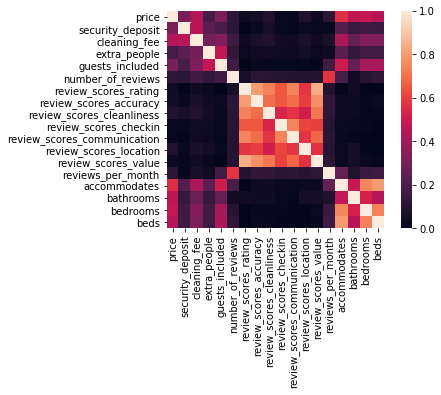

In [88]:
corra=df[v_con].corr()
(sns.heatmap(corra, vmax=1,vmin=0, square=True).get_figure()).savefig('Correlacion.png')

     Instanciamos los metodos de rescalamiento

In [89]:
sc = StandardScaler()
mmsc = MinMaxScaler()

     Instanciamos los metodos para reducción de dimensiones

In [90]:
pca = PCA(n_components=2)
mds = MDS(n_components=2,n_jobs=-1)
tsne = TSNE(n_components=2)

In [91]:
feat=pd.DataFrame()
feat['var']=v_con
feat['value']=gb_0.feature_importances_
feat[feat['value']>=0.01]['var'].tolist()
#.sort_values(by='value',ascending=False)

['price',
 'cleaning_fee',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month']

In [92]:
df_C=df[df['host_is_superhost']==1]

In [93]:
%%time
dfs=df_C.sample(frac=0.04).copy()
X=dfs[['price', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'review_scores_value', 
         'reviews_per_month']].copy()

mmsc.fit(X)
Xm = pd.DataFrame(mmsc.transform(X),columns=X.columns)
pca.fit(Xm)
a,b=pca.explained_variance_ratio_.cumsum()
print(b)

sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
pca.fit(Xs)
a,b=pca.explained_variance_ratio_.cumsum()
print(b)

0.5923816382414397
0.5588205243844285
CPU times: user 31.8 ms, sys: 3.44 ms, total: 35.2 ms
Wall time: 33.6 ms


In [94]:
print(dfs.shape)
print(X.shape)
print(Xm.shape)

(125, 138)
(125, 6)
(125, 6)


In [95]:
Xmds = pd.DataFrame(mds.fit_transform(Xm),columns=['d1','d2'])
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])
Xt = pd.DataFrame(tsne.fit_transform(Xm),columns=['d1','d2'])

In [96]:
Xmds['tgt'] = Xp['tgt'] = Xt['tgt'] = dfs['host_is_superhost'].to_list()

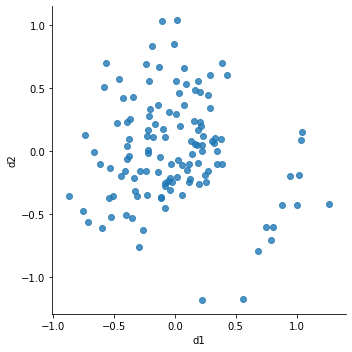

In [97]:
sns.lmplot(data=Xmds,x='d1',y='d2',fit_reg=False)

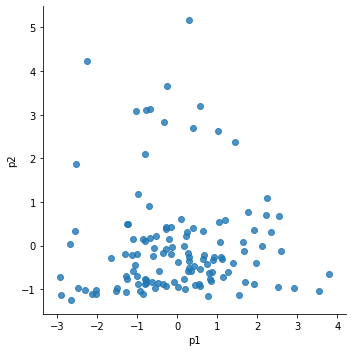

In [98]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

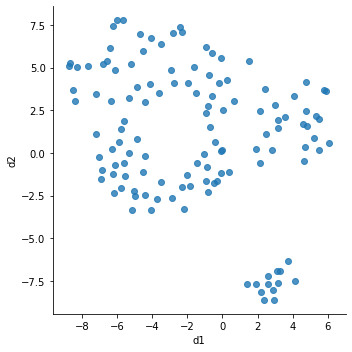

In [99]:
sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False)

### Cluster Jerarquico

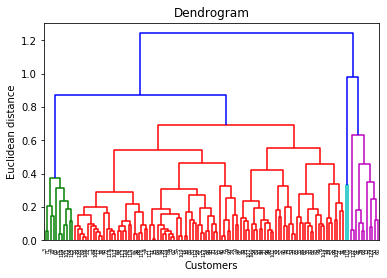

In [100]:
dendrogram = sch.dendrogram(sch.linkage(Xmds, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

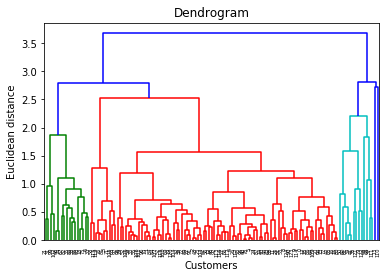

In [101]:
dendrogram = sch.dendrogram(sch.linkage(Xp, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

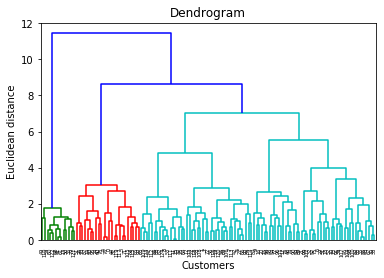

In [102]:
dendrogram = sch.dendrogram(sch.linkage(Xt, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

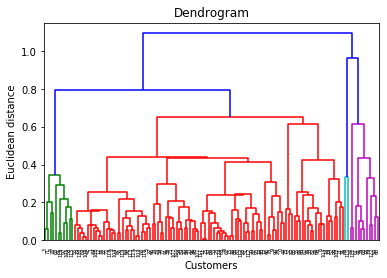

In [103]:
dendrogram = sch.dendrogram(sch.linkage(Xmds, method = 'centroid'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

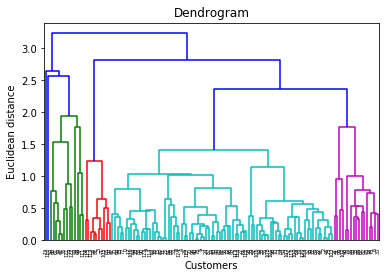

In [104]:
dendrogram = sch.dendrogram(sch.linkage(Xp, method = 'centroid'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

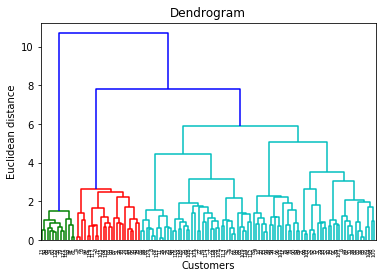

In [105]:
dendrogram = sch.dendrogram(sch.linkage(Xt, method = 'centroid'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

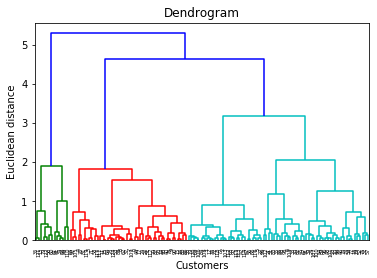

In [106]:
dendrogram = sch.dendrogram(sch.linkage(Xmds, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

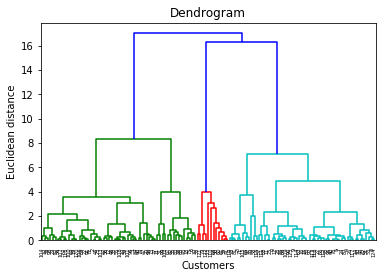

In [107]:
dendrogram = sch.dendrogram(sch.linkage(Xp, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

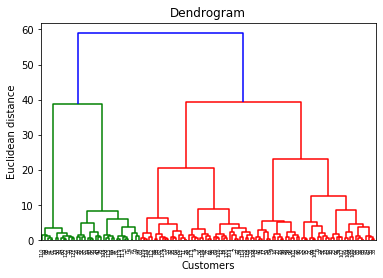

In [108]:
dendrogram = sch.dendrogram(sch.linkage(Xt, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [109]:
cluster = AgglomerativeClustering(linkage='average',
                                  n_clusters=1)

In [110]:
dfs['cl'] = X['cl'] = Xt['cl'] = cluster.fit_predict(Xm)

In [111]:
Xt.cl.value_counts()

0    125
Name: cl, dtype: int64

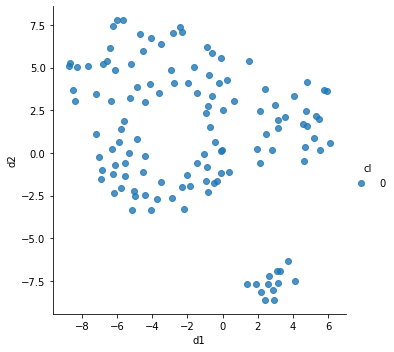

In [112]:
sns.lmplot(data=Xt,x='d1',y='d2',hue='cl',fit_reg=False)

In [113]:
cluster = AgglomerativeClustering(linkage='ward',
                                  n_clusters=3)

In [114]:
dfs['cl'] = X['cl'] = Xt['cl'] = cluster.fit_predict(Xm)

In [115]:
Xt.cl.value_counts(True)

0   0.54
2   0.36
1   0.10
Name: cl, dtype: float64

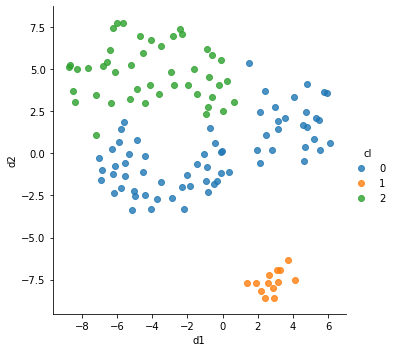

In [116]:
sns.lmplot(data=Xt,x='d1',y='d2',hue='cl',fit_reg=False)

### Cluster de Densidad

#### DBSCAN

In [117]:
cluster = DBSCAN(min_samples=20,n_jobs=-1)

In [118]:
cluster.fit(Xm)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=-1, p=None)

In [119]:
dfs['cl']=X['cl']=Xt['cl']=cluster.labels_

In [120]:
X['cl'].value_counts(True)

 0   0.88
-1   0.12
Name: cl, dtype: float64

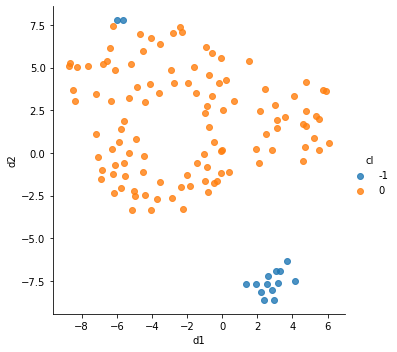

In [121]:
sns.lmplot(data=Xt,x='d1',y='d2',hue='cl',fit_reg=False)

#### Gaussiano Mixto

In [122]:
gmm = GaussianMixture(n_components=3,max_iter=2000,init_params='random')#,covariance_type='tied')

In [123]:
gmm.fit(Xm)

GaussianMixture(covariance_type='full', init_params='random', max_iter=2000,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [124]:
dfs['cl']=X['cl']=Xt['cl']=gmm.predict(Xm)

In [125]:
X['cl'].value_counts(True)

1   0.90
0   0.08
2   0.02
Name: cl, dtype: float64

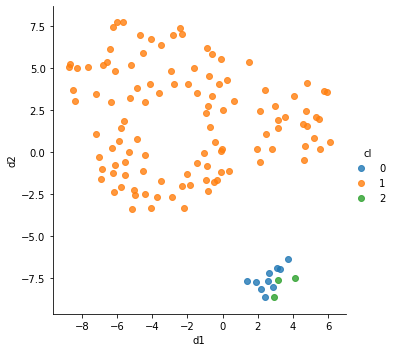

In [126]:
sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False,hue='cl')

### Cluster de Optimización

In [127]:
l = []
for k in range(2,10):
    cl = KMeans(n_clusters=k)
    cl.fit(Xm)
    l.append(cl.inertia_)

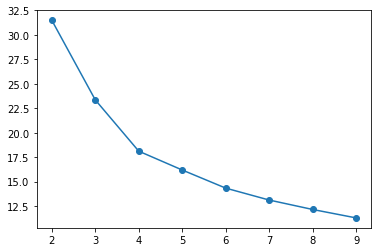

In [128]:
plt.plot(range(2,10),l,marker='o')

In [129]:
k=3

In [130]:
cluster = KMeans(n_clusters=k)

In [131]:
cluster.fit(Xm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [132]:
dfs['cl'] = X['cl'] = Xt['cl'] = cluster.predict(Xm)

In [133]:
Xt.cl.value_counts(True)

0   0.54
2   0.36
1   0.10
Name: cl, dtype: float64

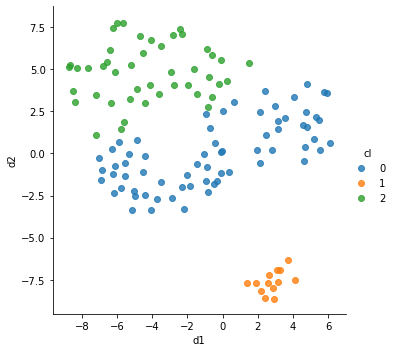

In [134]:
sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False,hue='cl').savefig('Kmeans.png')

### Aplicamos el modelo:

In [135]:
Xmc = pd.DataFrame(mmsc.transform(df_C[['price', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 
                                        'review_scores_value', 'reviews_per_month']]),columns=df_C[['price', 
                                        'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 
                                        'review_scores_value', 'reviews_per_month']].columns)

In [136]:
df_C['cl']=cluster.predict(Xmc) #<-Este modelo es kmeans  # gmm.predict(Xmc)

### PERFILAMIENTO

In [137]:
df_C['cl'].value_counts(True)

0   0.58
2   0.29
1   0.13
Name: cl, dtype: float64

In [138]:
dfs['cl'].value_counts(True)

0   0.54
2   0.36
1   0.10
Name: cl, dtype: float64

In [139]:
X.groupby('cl').mean()

,price,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_value,reviews_per_month
cl,,,,,,
0,"1,184.31",289.73,20.52,98.51,10.00,1.45
1,"1,037.54",271.38,34.38,95.15,9.00,1.83
2,730.18,178.49,82.40,97.40,10.00,3.90


In [140]:
df_C[['price', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'review_scores_value',
      'reviews_per_month']+['cl']].groupby('cl').mean()

,price,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_value,reviews_per_month
cl,,,,,,
0,"1,021.17",277.11,21.33,98.40,10.00,1.57
1,"1,032.16",255.15,32.55,94.09,8.92,1.97
2,845.96,209.49,75.49,97.47,10.00,3.96


### Perfilamiento Discretas

In [141]:
df_C['n'] = 1

In [142]:
t=1
for v in df_C[v_dis].columns:
    aux = df_C.pivot_table(index=v,fill_value=0,
                         columns='cl',aggfunc='count',values='n')
    for i in range(3):
        aux[i]/=aux[i].sum()
    
    display(pd.DataFrame(dfs[v].value_counts(True)))
    print('\n')
    display(aux)
    print('\n')

,neighbourhood_cleansed
Cuauhtémoc,0.54
Benito Juárez,0.16
Miguel Hidalgo,0.15
Coyoacán,0.03
Venustiano Carranza,0.02
Tlalpan,0.02
Azcapotzalco,0.02
Iztacalco,0.02
Iztapalapa,0.01
La Magdalena Contreras,0.01


cl,0,1,2
neighbourhood_cleansed,,,
Azcapotzalco,0.01,0.01,0.00
Benito Juárez,0.18,0.15,0.15
Coyoacán,0.05,0.06,0.05
Cuajimalpa de Morelos,0.02,0.02,0.00
Cuauhtémoc,0.48,0.49,0.59
Gustavo A. Madero,0.01,0.01,0.01
Iztacalco,0.01,0.01,0.02
Iztapalapa,0.00,0.00,0.00
La Magdalena Contreras,0.00,0.00,0.00


,room_type
Entire home/apt,0.63
Private room,0.37


cl,0,1,2
room_type,,,
Entire home/apt,0.65,0.72,0.66
Private room,0.34,0.28,0.34
Shared room,0.01,0.00,0.00


,cancellation_policy
moderate,0.44
flexible,0.36
strict_14_with_grace_period,0.20


cl,0,1,2
cancellation_policy,,,
flexible,0.35,0.34,0.28
moderate,0.42,0.40,0.43
strict_14_with_grace_period,0.23,0.26,0.29


### Pruebas de Significancia

In [143]:
kruskal([0,1,2],[0,1,2],[2,1,0])

KruskalResult(statistic=0.0, pvalue=1.0)

In [144]:
['price', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'review_scores_value', 'reviews_per_month']

['price',
 'cleaning_fee',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month']

In [145]:
l_p = []
for v in ['price', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'review_scores_value', 
         'reviews_per_month']:
    l = []
    for i in range(2):
        l.append(df_C.loc[df_C.cl==i][v].to_list())
    kr = kruskal(*l)
    l_p.append((v,kr.pvalue))

In [146]:
df_sig = pd.DataFrame(l_p,columns=['variable','p-value'])
df_sig['p-value'] = df_sig['p-value'].map(lambda x:round(x,6))

In [147]:
df_sig.sort_values(by='p-value',ascending=False)

,variable,p-value
0,price,0.76
1,cleaning_fee,0.06
5,reviews_per_month,0.01
2,number_of_reviews,0.00
3,review_scores_rating,0.00
4,review_scores_value,0.00


In [148]:
for v in df_C[v_dis].columns:
    aux = df_C.pivot_table(index=v,fill_value=0,
                         columns='cl',aggfunc='count',values='n')
    for i in range(2):
        aux[i]/=aux[i].sum()
    aux['total']=df_C[v].value_counts(True)
    exp = aux['total'].to_list()
    print(v)
    for c in aux.columns:
        print(c)
        obs = aux[c].to_list()
        print(chisquare(f_obs=aux[c],f_exp=exp))
        print('\n')

neighbourhood_cleansed
0
Power_divergenceResult(statistic=0.012843592165541661, pvalue=1.0)


1
Power_divergenceResult(statistic=0.01626344838405358, pvalue=1.0)


2
Power_divergenceResult(statistic=866340.3986111023, pvalue=0.0)


total
Power_divergenceResult(statistic=0.0, pvalue=1.0)


room_type
0
Power_divergenceResult(statistic=0.00206105844729207, pvalue=0.9989700015892393)


1
Power_divergenceResult(statistic=0.01812298884918138, pvalue=0.990979437188848)


2
Power_divergenceResult(statistic=822752.8834563248, pvalue=0.0)


total
Power_divergenceResult(statistic=0.0, pvalue=1.0)


cancellation_policy
0
Power_divergenceResult(statistic=0.002879127178250088, pvalue=0.9985614720855057)


1
Power_divergenceResult(statistic=0.0016354307121067336, pvalue=0.9991826188820383)


2
Power_divergenceResult(statistic=830802.7044080782, pvalue=0.0)


total
Power_divergenceResult(statistic=0.0, pvalue=1.0)




In [149]:
for v in df_sig['variable']:
    print(v)
    mc = MultiComparison(df_C[v],df_C['cl'])
    print(mc.tukeyhsd().summary())
    print('\n')

price
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     0      1    10.983   0.9  -70.8473   92.8132  False
     0      2  -175.209 0.001 -235.7906 -114.6273   True
     1      2 -186.1919 0.001  -275.123  -97.2609   True
--------------------------------------------------------


cleaning_fee
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1  -21.959 0.1544 -49.8175   5.8996  False
     0      2  -67.622  0.001 -88.2466 -46.9974   True
     1      2  -45.663 0.0012  -75.939 -15.3871   True
------------------------------------------------------


number_of_reviews
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  11.2

### CONCLUSIONES


 Terminamos modelación supervisada y no supervisada, se ha invertido demasiado tiempo. Necesitas continuar para dar el siguiente paso.

## Modulo 4: Tecnicas Cognitivas

### MODULO 4.0: Analysis for Natural Language Processing

### Objetivo:
    Para esta sección se usará otro dataset que venia en el paquete de información el cual será los comentarios(reviews) de los huespedes alojados, sin embargo solo se conciderarán los de aquellos alojamientos donde el anfitrión sea un Super Host 

### Comentario:
    Por cuestiones tecnicas, se elabora la detección de lenguaje de los reviews en google colab, por lo que el siguiente archivo cargado será de los comentarios 

In [150]:
dr=pd.read_csv('/home/maik/Documentos/Diplomado Ciencia de Datos Plus/Reviews_Textacy.csv')

In [151]:
dr.shape

(205515, 8)

In [152]:
dr.sample(1)

,id_x,listing_id,id_y,date,reviewer_id,reviewer_name,comments,language
69832,15214331,15214331,114458319,2016-11-18,21805690,Perrine,"Ubicación perfecta, cerca del metro, restauran...",es


In [153]:
dr['language'].value_counts(True)

es   0.49
en   0.44
ro   0.01
pt   0.01
fr   0.01
     ... 
sr   0.00
mt   0.00
uz   0.00
ku   0.00
uk   0.00
Name: language, Length: 89, dtype: float64

 Notemos que la mayoria de comentarios se encuentra en idioma español e idioma ingles por lo que el siguiente analisis se elaborará únicamente para estos comentarios

In [154]:
import spacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS as STOP_WORDS1 
from spacy.lang.es.stop_words import STOP_WORDS as STOP_WORDS2
import re
import nltk
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [157]:
%%time
nlp1=spacy.load('en_core_web_lg')
nlp2=spacy.load('es_core_news_md')

CPU times: user 40.7 s, sys: 2.27 s, total: 43 s
Wall time: 1min 2s


In [158]:
dr1=dr[dr['language']=='en'][['id_x','comments']].sample(frac=0.03).copy().reset_index(drop=True)
dr2=dr[dr['language']=='es'][['id_x','comments']].sample(frac=0.03).copy().reset_index(drop=True)

In [159]:
print(dr1.shape)
print(dr2.shape)

(2686, 2)
(3039, 2)


In [160]:
dr1['comments']=dr1['comments'].map(lambda x: x.lower())
# dr1['comments']=dr1['comments'].map(lambda x: x.replace('á','a'))
# dr1['comments']=dr1['comments'].map(lambda x: x.replace('é','e'))
# dr1['comments']=dr1['comments'].map(lambda x: x.replace('í','i'))
# dr1['comments']=dr1['comments'].map(lambda x: x.replace('ó','o'))
# dr1['comments']=dr1['comments'].map(lambda x: x.replace('ú','u'))
dr2['comments']=dr2['comments'].map(lambda x: x.lower())
# dr2['comments']=dr2['comments'].map(lambda x: x.replace('á','a'))
# dr2['comments']=dr2['comments'].map(lambda x: x.replace('é','e'))
# dr2['comments']=dr2['comments'].map(lambda x: x.replace('í','i'))
# dr2['comments']=dr2['comments'].map(lambda x: x.replace('ó','o'))
# dr2['comments']=dr2['comments'].map(lambda x: x.replace('ú','u'))

In [161]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

In [162]:
dr1['comments']=dr1['comments'].apply(lambda x: normalize(x))
dr2['comments']=dr2['comments'].apply(lambda x: normalize(x))

In [163]:
for sig in [',','.','!',':','-','(',')','\n','"',';','\r','/']:
    dr1['comments']=dr1['comments'].map(lambda x: x.replace(sig,' '))
dr1['comments']=dr1['comments'].map(lambda x: re.sub(' +',' ',x))

for sig in [',','.','!',':','-','(',')','\n','"',';','\r','/']:
    dr2['comments']=dr2['comments'].map(lambda x: x.replace(sig,' '))
dr2['comments']=dr2['comments'].map(lambda x: re.sub(' +',' ',x))

In [164]:
text3=dr1['comments'].tolist()
text3=" ".join(x for x in text3)

text4=dr2['comments'].tolist()
text4=" ".join(x for x in text4)

### Tipos dep_

#### nsubj: Nominal subject.
#### prep: Preposition.
#### pobj: Object of preposition.
#### NNP: Proper noun, singular.
#### VBD: Verb, past tense.
#### IN: Conjunction, subordinating or preposition.

In [165]:
%%time
text1=u''
aux=nlp1(text3)
for word in aux.noun_chunks:
    if (word.root.dep_ in ['nsubj']): #    if (word.pos_=='NOUN') and (word.dep_ in ['nsubj']): # ['pobj','nsubj','dobj','compound','conj','attr','npadvmod','ROOT','nmod','nsubjpass','appos','amod']
        if str(word) not in STOP_WORDS1: # not in ['ADJ','ADP','AUX','PROP']:
#             word=word.lemma_
            text1=text1+str(word)+' '

CPU times: user 23.1 s, sys: 4.9 s, total: 28 s
Wall time: 29.9 s


In [166]:
%%time
text2=u''
aux=nlp2(text4)
for word in aux.noun_chunks:
    if (word.root.dep_ in ['nsubj']): #(word.pos_=='NOUN') and  # ['nsubj','nmod','obj','obl','conj','ROOT','amod']
        if str(word) not in STOP_WORDS2: # not in ['ADJ','ADP','AUX','PROP']:
#             word=word.lemma_
            text2=text2+str(word)+' '

CPU times: user 14.1 s, sys: 2.53 s, total: 16.6 s
Wall time: 17.2 s


In [167]:
for stop in ['place','apartment','location','host','great','neighborhood','hosts']:
    STOP_WORDS1.add(stop)

for stop in ['departamento','ubicacion','apartamento','anfitrion','estancia','super','comunicacion','zona',
             'atencion','alojamiento','excelente','gracias','persona','detalle','depa','anfitriones','anfitriona',
             'host','hospedaje','hospitalidad','barrio','opncion','espacio']:
    STOP_WORDS2.add(stop)

In [168]:
len(text1)

72917

In [169]:
len(text2)

42308

In [170]:
mask = np.array(Image.open("/home/maik/Imágenes/logo2.png"))

In [171]:
image_colors = ImageColorGenerator(mask)

In [172]:
wc1 = WordCloud(stopwords=STOP_WORDS1, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text1)

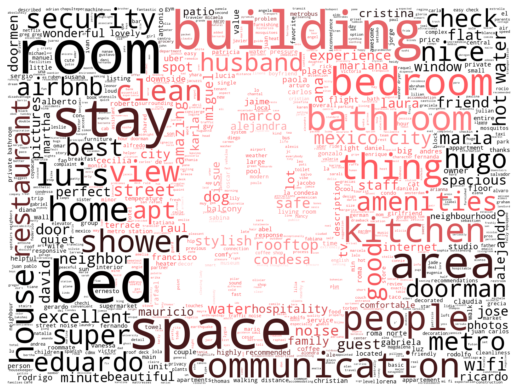

In [173]:
plt.figure(figsize=[7,7])
plt.imshow(wc1.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 

#plt.savefig('wc1f2.png')
plt.show()

In [174]:
wc2 = WordCloud(stopwords=STOP_WORDS2, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text2)

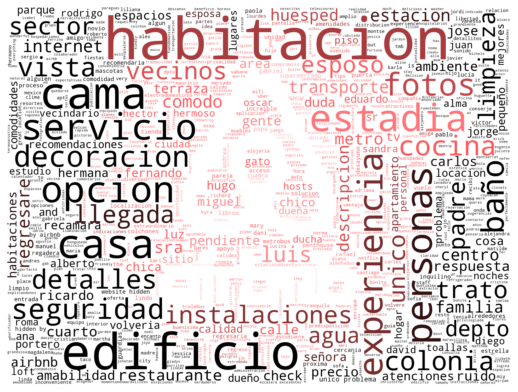

In [175]:
plt.figure(figsize=[7,7])
plt.imshow(wc2.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 

#plt.savefig('wc2f2.png')
plt.show()

### CONCLUSIÓN:
    Ante la muestra del interes de los huespedes por el cuarto de baño, procederemos a realizar un análisis de de las fotografias que tengan los host que no poseen la insignia Super Host

### MODULO 4.1: Web Scraping

### Objetivo:
    Del dataset de los alojamientos se emplearán los links para acceder a la publicación del alojamiento y extraer las fotografias tomadas por los Host

In [176]:
print(df['picture_url'].sample(1))

667    https://a0.muscache.com/im/pictures/cc1f656f-c...
Name: picture_url, dtype: object


In [177]:
df['picture_url']=df['picture_url'].apply(lambda x: x.replace('?aki_policy=large',''))

In [178]:
import urllib.request as request

In [179]:
# %%time
# n=5589
# for x in df['picture_url'][5589:]:
#     request.urlretrieve(x,'/home/maik/Imágenes/Airbnb Scraping/'+str(n))
#     n+=1

### MODULO 4.2: Building NNC

### Objetivo:
    Del

In [1]:
import sys
import os
import tensorflow.keras as kr

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras import backend as K

import numpy as np

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model

In [2]:
# for i in ['Comedor','Habitación','Sala']:#,'Sala&Comedor']:
#     for item in os.listdir('/home/maik/Imágenes/NNC/'+i):
#         os.rename('/home/maik/Imágenes/NNC/'+i+'/'+item,'/home/maik/Imágenes/NNC/'+i+'/'+item+'.jpg')

In [19]:
%%time
K.clear_session()

data_validacion='/home/maik/Imágenes/NNC/Test'
data_entrenamiento='/home/maik/Imágenes/NNC/Train'

#Parametros
epocas=1 #Núm de veces a iterar sobre el entrenamiento
altura, longitud=100,100 #Tamaño al que se procesarán las imagenes
batch_size=32 #Núm de imagenes a procesar en cada paso
pasos=1000 #Núm de veces que se procesa la inf en cada epoca
pasos_validacion=100 #Cada n pasos evaluara el test
# filtrosConv1=32 #Profundidad de la imagen despues de la Con1 
# filtrosConv2=64 #Profundidad de la imagen despues de la Con2
# tamaño_filtro1=(3,3)
# tamaño_filtro2=(2,2)
# tamaño_pool=(2,2)
clases=3
lr=0.005


#Pre-procesamiento de imagenes
entrenamiento_datagen=kr.preprocessing.image.ImageDataGenerator(
#    rescale=1/255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True)

validacion_datagen=kr.preprocessing.image.ImageDataGenerator(
#    rescale=1/255
)

imagen_entrenamiento=entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(altura,longitud),
    batch_size=batch_size,
    class_mode='categorical'
)

imagen_validacion=validacion_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura,longitud),
    batch_size=batch_size,
    class_mode='categorical'
)

# #Crear red CNN
# cnn=kr.Sequential() #
# cnn.add(kr.layers.Convolution2D(filters=filtrosConv1,kernel_size=tamaño_filtro1,padding='same',input_shape=(altura,longitud,3),activation='relu'))
# cnn.add(kr.layers.MaxPooling2D(pool_size=tamaño_pool))
# cnn.add(kr.layers.Convolution2D(filters=filtrosConv2,kernel_size=tamaño_filtro2,padding='same',activation='relu'))
# cnn.add(kr.layers.MaxPooling2D(pool_size=tamaño_pool))

# cnn.add(kr.layers.Flatten())
# cnn.add(kr.layers.Dense(256,activation='relu'))
# cnn.add(kr.layers.Dropout(0.5))
# cnn.add(kr.layers.Dense(clases,activation='softmax'))

# cnn.compile(loss='categorical_crossentropy',optimizer=kr.optimizers.Adam(lr=lr),metrics=['accuracy'])

# cnn.fit(imagen_entrenamiento,
#         steps_per_epoch=pasos,epochs=epocas,
#         validation_data=imagen_validacion,validation_steps=pasos_validacion
#        )

Found 300 images belonging to 3 classes.
Found 130 images belonging to 3 classes.
CPU times: user 89.3 ms, sys: 7.94 ms, total: 97.3 ms
Wall time: 238 ms


In [20]:
model=ResNet50(weights=None,classes=3)
model.compile(loss='categorical_crossentropy',optimizer=kr.optimizers.Adam(lr=lr),metrics=['accuracy'])

In [ ]:
%%time
model.fit(imagen_entrenamiento,
        steps_per_epoch=pasos,epochs=epocas,
        validation_data=imagen_validacion,validation_steps=pasos_validacion
        )

  12/1000 [..............................] - ETA: 1:42:29 - loss: 5.8190 - accuracy: 0.3544

In [6]:
t1='./modelo/RN50V2_airbnb_E1_C3_v1_lr01.h5'
t2='./modelo/RN50V2_airbnb_pesos_E1_C3_v1_lr01.h5'
model.save(t1)
model.save_weights(t2)

In [3]:
# def show_batch(image_batch, label_batch):
#   plt.figure(figsize=(10,10))
#   for n in range(2):
#       ax = plt.subplot(5,5,n+1)
#       plt.imshow(image_batch[n])
# #       plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
#       plt.axis('off')

# image_batch, label_batch = next(imagen_entrenamiento)
# show_batch(image_batch, label_batch)

### Pasamos a llamar el modelo y los pesos guardados del entrenamiento

In [8]:
modelo=kr.models.load_model(t1)
modelo.add_weight(t2)

<tf.Variable './modelo/RN50V2_airbnb_pesos_E10_C3_v1.h5:0' shape=() dtype=float32, numpy=-0.40958464>

In [9]:
def predice(file):
    x=kr.preprocessing.image.load_img(file,target_size=(altura,longitud))
    x=kr.preprocessing.image.img_to_array(x)
    x=np.expand_dims(x,axis=0)
    arreglo=modelo.predict(x)
    resultado=arreglo[0]
    respuesta=np.argmax(resultado)
    if respuesta==0:
        print('Comedor')
    elif respuesta==1:
        print('Habitación')
    elif respuesta==2:
        print('Sala')
#     elif respuesta==3:
#         print('Sala&Comedor')
    return respuesta

In [10]:
j=0
d='/home/maik/Imágenes/NNC/Validate/'
for j in ['Comedor','Habitación','Sala']: #,'Sala&Comedor']:
    l=os.listdir(d+j)
    print('->',j)
    for i in l:
        predice(d+j+'/'+i)
    print('')
    
#     r=predice(d+i)
#     if r==1:
#         j=j+1
# print(j/len(l))

# j=0
# l=os.listdir(d)
# for i in l:
#     r=predice2(d+i)
#     if r==2:
#         j=j+1
# print(j/len(l))

-> Comedor
Comedor
Comedor
Sala
Sala
Habitación
Habitación
Sala
Comedor
Sala
Sala

-> Habitación
Habitación
Habitación
Sala
Habitación
Habitación
Habitación
Habitación
Habitación
Habitación
Habitación

-> Sala
Habitación
Sala
Sala
Habitación
Habitación
Habitación
Sala
Sala
Sala
Sala



In [7]:
model_to_dot(model)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [8]:
plot_model(model,to_file='model.png')
SVG(model_to_dot(model). create(prog='dot',format=svg))

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


AttributeError: 'NoneType' object has no attribute 'create'

In [2]:
#loss,acurracy=model.evaluate(imagen_entrenamiento)

In [30]:
model.evaluate?

In [45]:
model.evaluate[0]

TypeError: 'method' object is not subscriptable